<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

# Part 1: EDA & Cleaning

--- 
# Overview


To use Singapore public housing data to create a regression model that predicts the price of Housing Development Board (HDB) flats in Singapore. This model will predict the price of a house at sale.

---

#### There are three datasets:

  1. [`train.csv`]: this data contains all of the training data for your model.
The target variable (SalePrice) is removed from the test set!
  2. [`test.csv`]: this data contains the test data for your model. You will feed this data into your regression model to make predictions.
  3. [`sample_sub_reg.csv`]: An example of a correctly formatted submission for this challenge (with a random number provided as predictions for SalePrice. Please ensure that your submission to Kaggle matches this format.

### Data Dictionary

|Feature|Type|Description|
|---|---|---|
|**resale_price**|*float*|the property's sale price in Singapore dollars. This is the target variable that you're trying to predict for this challenge.| 
|**Tranc_YearMonth**|*object*|year and month of the resale transaction, e.g. 2015-02|
|**flat_type**|*object*|type of the resale flat unit, e.g. 3 ROOM|
|**flat_model**|*object*|HDB model of the resale flat, e.g. Multi Generation|
|**lease_commence_date**|*integer*|commencement year of the flat unit's 99-year lease|
|**Tranc_Year**|*integer*|year of resale transaction|
|**Tranc_Month**|*integer*|month of resale transaction|
|**mid_storey**|*integer*|median value of storey_range|
|**full_flat_type**|*object*|combination of flat_type and flat_model|
|**floor_area_sqft**|*float*|floor area of the resale flat unit in square feet|
|**hdb_age**|*integer*|number of years from lease_commence_date to present year|
|**max_floor_lvl**|*integer*|highest floor of the resale flat|
|**commercial**|*object*|boolean value if resale flat has commercial units in the same block|
|**market_hawker**|*object*|boolean value if resale flat has a market or hawker centre in the same block|
|**multistorey_carpark**|*object*|boolean value if resale flat has a multistorey carpark in the same block|
|**precinct_pavilion**|*object*|boolean value if resale flat has a pavilion in the same block|
|**total_dwelling_units**|*integer*|total number of residential dwelling units in the resale flat|
|**1room_sold**|*integer*|number of 1-room residential units in the resale flat| 
|**2room_sold**|*integer*|number of 2-room residential units in the resale flat|
|**3room_sold**|*integer*|number of 3-room residential units in the resale flat|
|**4room_sold**|*integer*|number of 4-room residential units in the resale flat|
|**5room_sold**|*integer*|number of 5-room residential units in the resale flat|
|**exec_sold**|*integer*|number of executive type residential units in the resale flat block|
|**multigen_sold**|*integer*|number of multi-generational type residential units in the resale flat block|
|**studio_apartment_sold**|*integer*|number of studio apartment type residential units in the resale flat block|
|**1room_rental**|*integer*|number of 1-room rental residential units in the resale flat block|
|**2room_rental**|*integer*|number of 2-room rental residential units in the resale flat block|
|**3room_rental**|*integer*|number of 3-room rental residential units in the resale flat block|
|**other_room_rental**|*integer*|number of "other" type rental residential units in the resale flat block|
|**planning_area**|*object*|Government planning area that the flat is located|
|**Mall_Nearest_Distance**|*float*|distance (in metres) to the nearest mall|
|**Mall_Within_500m**|*float*|number of malls within 500 metres|
|**Mall_Within_1km**|*float*|number of malls within 1 kilometre|
|**Mall_Within_2km**|*float*|number of malls within 2 kilometres|
|**Hawker_Nearest_Distance**|*float*|distance (in metres) to the nearest hawker centre|
|**Hawker_Within_500m**|*float*|number of hawker centres within 500 metres|
|**Hawker_Within_1km**|*float*|number of hawker centres within 1 kilometre|
|**Hawker_Within_2km**|*float*|number of hawker centres within 2 kilometres|
|**hawker_food_stalls**|*integer*|number of hawker food stalls in the nearest hawker centre|
|**hawker_market_stalls**|*integer*|number of hawker and market stalls in the nearest hawker centre|
|**mrt_nearest_distance**|*float*|distance (in metres) to the nearest MRT station|
|**bus_interchange**|*integer*|boolean value if the nearest MRT station is also a bus interchange|
|**mrt_interchange**|*integer*|boolean value if the nearest MRT station is a train interchange station|
|**bus_stop_nearest_distance**|*float*|distance (in metres) to the nearest bus stop|
|**pri_sch_nearest_distance**|*float*|distance (in metres) to the nearest primary school|
|**vacancy**|*integer*|number of vacancies in the nearest primary school|
|**pri_sch_affiliation**|*integer*|boolean value if the nearest primary school has a secondary school affiliation|
|**sec_sch_nearest_dist**|*float*|distance (in metres) to the nearest secondary school|
|**cutoff_point**|*integer*|PSLE cutoff point of the nearest secondary school|
|**affiliation**|*integer*|boolean value if the nearest secondary school has an primary school affiliation|

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)

## Data Import and Cleaning

### Import our training data

In [2]:
train = pd.read_csv("../datasets/train.csv")
train.head()

/var/folders/l3/fj37td4n0v5dx2z6bx4nz9cc0000gn/T/ipykernel_47565/3648110685.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../datasets/train.csv")


id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   ...  Mall_Within_1km  Mall_Within_2km  Hawker_Nearest_Distance  \
0  ...              NaN              7.0               154.753357   
1  ...              1.0              3.0               640.151925   
2  ...              NaN              4.0              1762.082341   
3  ...              1.0              4.0               726.215262   
4  ...              1.0              2.0              1540.151439   

   Hawker_Within_500m  Hawker_Within_1km  Hawker_Within_2km  \
0                 1.0                3.0               13.0   
1                 NaN                1.0                7.0   
2                 NaN                NaN                1.0   
3                 NaN                1.0                9.0   
4                 NaN                NaN                1.0   

   hawker_food_stalls  hawker_market_stalls  mrt_nearest_distance  \
0                  84                    60            330.083069   
1                  80                    77            903.659703   
2                  84                    95           1334.251197   
3                  32                    86            907.453484   
4                  45                     0            412.343032   

      mrt_name  bus_interchange  mrt_interchange mrt_latitude  mrt_longitude  \
0     

In [3]:
# specify dtype of 'postal' column as string
train = pd.read_csv("../datasets/train.csv", dtype={'postal': str})

In [4]:
# view no. of rows and columns in dataset
train.shape

(150634, 78)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [6]:
# view columns with null values
train.isnull().sum().sort_values(ascending=False).head(10)

Hawker_Within_500m         97390
Mall_Within_500m           92789
Hawker_Within_1km          60868
Hawker_Within_2km          29202
Mall_Within_1km            25426
Mall_Within_2km             1940
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
mrt_nearest_distance           0
hawker_market_stalls           0
dtype: int64

In [7]:
# Convert all columns to snake case
train.columns = train.columns.str.lower().str.replace(' ', '_')

#### View 1st 30 features

In [8]:
# view 1st 30 features out of 78
train.iloc[:, :30].head(10).T

0                  1  \
id                                   88471             122598   
tranc_yearmonth                    2016-05            2012-07   
town                       KALLANG/WHAMPOA             BISHAN   
flat_type                           4 ROOM             5 ROOM   
block                                   3B                153   
street_name               UPP BOON KENG RD       BISHAN ST 13   
storey_range                      10 TO 12           07 TO 09   
floor_area_sqm                        90.0              130.0   
flat_model                         Model A           Improved   
lease_commence_date                   2006               1987   
resale_price                      680000.0           665000.0   
tranc_year                            2016               2012   
tranc_month                              5                  7   
mid_storey                              11                  8   
lower                                   10                  7   
upper                                   12                  9   
mid                                     11                  8   
full_flat_type              4 ROOM Model A    5 ROOM Improved   
address               3B, UPP BOON KENG RD  153, BISHAN ST 13   
floor_area_sqft                     968.76            1399.32   
price_per_sqft                  701.928238         475.230826   
hdb_age                                 15                 34   
max_floor_lvl                           25                  9   
year_completed                        2005               1987   
residential                              Y                  Y   
commercial                               N                  N   
market_hawker                            N                  N   
multistorey_carpark                      N                  N   
precinct_pavilion                        N                  N   
total_dwelling_units                   142                112   

                                         2                  3  \
id                                  170897              86070   
tranc_yearmonth                    2013-07            2012-04   
town                           BUKIT BATOK             BISHAN   
flat_type                        EXECUTIVE             4 ROOM   
block                                 289B                232   
street_name                 BT BATOK ST 25       BISHAN ST 22   
storey_range                      13 TO 15           01 TO 05   
floor_area_sqm                       144.0              103.0   
flat_model                       Apartment            Model A   
lease_commence_date                   1997               1992   
resale_price                      838000.0           550000.0   
tranc_year                            2013               2012   
tranc_month                              7                  4   
mid_storey                              14                  3   
lower                                   13                  1   
upper                                   15                  5   
mid                                     14                  3   
full_flat_type         EXECUTIVE Apartment     4 ROOM Model A   
address               289B, BT BATOK ST 25  232, BISHAN ST 22   
floor_area_sqft                   1550.016           1108.692   
price_per_sqft                   540.63958         496.080066   
hdb_age                                 24                 29   
max_floor_lvl                           16                 11   
year_completed                        1996               1990   
residential                              Y                  Y   
commercial                               N                  Y   
market_hawker                            N                  N   
multistorey_carpark                      N                  N   
precinct_pavilion                        N                  N   
total_dwelling_units                    90                 75   

         

In [9]:
train.iloc[:, :30].describe(include="all").T

count unique                  top    freq  \
id                    150634.0    NaN                  NaN     NaN   
tranc_yearmonth         150634    110              2018-07    2088   
town                    150634     26          JURONG WEST   11451   
flat_type               150634      7               4 ROOM   61136   
block                   150634   2514                    2     579   
street_name             150634    553       YISHUN RING RD    2451   
storey_range            150634     25             04 TO 06   34699   
floor_area_sqm        150634.0    NaN                  NaN     NaN   
flat_model              150634     20              Model A   46261   
lease_commence_date   150634.0    NaN                  NaN     NaN   
resale_price          150634.0    NaN                  NaN     NaN   
tranc_year            150634.0    NaN                  NaN     NaN   
tranc_month           150634.0    NaN                  NaN     NaN   
mid_storey            150634.0    NaN                  NaN     NaN   
lower                 150634.0    NaN                  NaN     NaN   
upper                 150634.0    NaN                  NaN     NaN   
mid                   150634.0    NaN                  NaN     NaN   
full_flat_type          150634     43       4 ROOM Model A   35127   
address                 150634   9157  91, TANGLIN HALT RD     106   
floor_area_sqft       150634.0    NaN                  NaN     NaN   
price_per_sqft        150634.0    NaN                  NaN     NaN   
hdb_age               150634.0    NaN                  NaN     NaN   
max_floor_lvl         150634.0    NaN                  NaN     NaN   
year_completed        150634.0    NaN                  NaN     NaN   
residential             150634      1                    Y  150634   
commercial              150634      2                    N  121815   
market_hawker           150634      2                    N  150619   
multistorey_carpark     150634      2                    N  150592   
precinct_pavilion       150634      2                    N  150499   
total_dwelling_units  150634.0    NaN                  NaN     NaN   

                               mean            std         min         25%  \
id                     93047.887496   53679.906247         1.0    46469.25   
tranc_yearmonth                 NaN            NaN         NaN         NaN   
town                            NaN            NaN         NaN         NaN   
flat_type                       NaN            NaN         NaN         NaN   
block                           NaN            NaN         NaN         NaN   
street_name                     NaN            NaN         NaN         NaN   
storey_range                    NaN            NaN         NaN         NaN   
floor_area_sqm             97.19763       24.40304        31.0        75.0   
flat_model                      NaN            NaN         NaN         NaN   
lease_commence_date     1992.448464      12.138829      1966.0      1984.0   
resale_price          449161.501213  143307.573143    150000.0    347000.0   
tranc_year              2016.489551       2.752396      2012.0      2014.0   
tranc_month                  6.5805       3.345468         1.0         4.0   
mid_storey                 8.284823       5.508074         2.0         5.0   
lower                       7.24837       5.515155         1.0         4.0   
upper                      9.321275       5.507364         3.0         6.0   
mid                        8.284823       5.508074         2.0         5.0   
full_flat_type                  NaN            NaN         NaN         NaN   
address                         NaN            NaN         NaN         NaN   
floor_area_sqft          1046.23529     262.674321     333.684       807.3   
price_per_sqft            434.13028      104.79718  205.108901  364.973191   
hdb_age                   28.551536      12.138829         2.0        20.0   
max_floor_lvl             15.139816       6.232492         2

  + There are no missing features
  + All datatypes listed are correct for their respective data
  + We shall remove **"storey_range"**, **"lower"**, **"upper"** and **"mid"** as **"mid_storey"** is indicative of which storey the transaction was made
  + To remove **"floor_area_sqm"** as it is equivalent to **"floor_area_sqft"**
  + To remove **"price_per_sqft"** as it is a derived variable from **"resale_price"**
  + To remove **"lease_commence_date"** as it is inversely correlated with **"hdb_age"**. **"year_completed"** is irrelevant too
  + To remove **"block"**, **"street_name"**, **"address"** and **"town"** as there are other location identifiers such as **"planning_area"** and these string values have no relation to target price

#### View 2nd 30 features

In [10]:
# view 2nd 30 features out of 78
train.iloc[:, 30:60].head(10).T

0           1            2           3  \
1room_sold                         0           0            0           0   
2room_sold                         0           0            0           0   
3room_sold                         0           0            0           0   
4room_sold                        96          56            0          68   
5room_sold                        46          56           30           7   
exec_sold                          0           0           60           0   
multigen_sold                      0           0            0           0   
studio_apartment_sold              0           0            0           0   
1room_rental                       0           0            0           0   
2room_rental                       0           0            0           0   
3room_rental                       0           0            0           0   
other_room_rental                  0           0            0           0   
postal                        382003      570153       651289      570232   
latitude                    1.314299    1.346086     1.343867    1.358245   
longitude                 103.872828  103.855078   103.760535  103.845504   
planning_area                Kallang      Bishan  Bukit Batok      Bishan   
mall_nearest_distance    1094.090418  866.941448  1459.579948  950.175199   
mall_within_500m                 NaN         NaN          NaN         NaN   
mall_within_1km                  NaN         1.0          NaN         1.0   
mall_within_2km                  7.0         3.0          4.0         4.0   
hawker_nearest_distance   154.753357  640.151925  1762.082341  726.215262   
hawker_within_500m               1.0         NaN          NaN         NaN   
hawker_within_1km                3.0         1.0          NaN         1.0   
hawker_within_2km               13.0         7.0          1.0         9.0   
hawker_food_stalls                84          80           84          32   
hawker_market_stalls              60          77           95          86   
mrt_nearest_distance      330.083069  903.659703  1334.251197  907.453484   
mrt_name                     Kallang      Bishan  Bukit Batok      Bishan   
bus_interchange                    0           1            1           1   
mrt_interchange                    0           1            0           1   

                                   4           5            6            7  \
1room_sold                         0           0            0            0   
2room_sold                         0           0            0            0   
3room_sold                         0         188            0          110   
4room_sold                        30           0            0           22   
5room_sold                        18           5           64            0   
exec_sold                          0           0            0            0   
multigen_sold                      0           0            0            0   
studio_apartment_sold              0           0            0            0   
1room_rental                       0           0            0            0   
2room_rental                       0           0            0            0   
3room_rental                       0           0            0            0   
other_room_rental                  0           0            0            0   
postal                        760876      380095       530641       470701   
latitude                    1.414745    1.321703     1.371276     1.337642   
longitude                 103.835532  103.886196   103.880059   103.918906   
planning_area                 Yishun     Geylang      Hougang        Bedok   
mall_nearest_distance     729.771895  684.004001   490.262931  1749.147519   
mall_within_500m                 NaN         NaN          1.0          NaN   
mall_within_1km                  1.0         3.0          1.0          NaN   
mall_within_2km                  2.0         6.0          8.0          3.0   
hawker_ne

In [11]:
train.iloc[:, 30:60].describe(include="all").T

count unique          top   freq         mean  \
1room_sold               150634.0    NaN          NaN    NaN     0.138813   
2room_sold               150634.0    NaN          NaN    NaN     1.782055   
3room_sold               150634.0    NaN          NaN    NaN    39.219366   
4room_sold               150634.0    NaN          NaN    NaN    50.083978   
5room_sold               150634.0    NaN          NaN    NaN    26.299853   
exec_sold                150634.0    NaN          NaN    NaN      5.94077   
multigen_sold            150634.0    NaN          NaN    NaN     0.023972   
studio_apartment_sold    150634.0    NaN          NaN    NaN     0.448564   
1room_rental             150634.0    NaN          NaN    NaN     0.063678   
2room_rental             150634.0    NaN          NaN    NaN     0.622516   
3room_rental             150634.0    NaN          NaN    NaN     0.059409   
other_room_rental        150634.0    NaN          NaN    NaN     0.000339   
postal                     150634   9125       142091    106          NaN   
latitude                 150634.0    NaN          NaN    NaN     1.366224   
longitude                150634.0    NaN          NaN    NaN   103.839391   
planning_area              150634     32  Jurong West  11451          NaN   
mall_nearest_distance    149805.0    NaN          NaN    NaN   664.239826   
mall_within_500m          57845.0    NaN          NaN    NaN     1.269237   
mall_within_1km          125208.0    NaN          NaN    NaN     2.149623   
mall_within_2km          148694.0    NaN          NaN    NaN     5.236486   
hawker_nearest_distance  150634.0    NaN          NaN    NaN  1173.700148   
hawker_within_500m        53244.0    NaN          NaN    NaN     1.382672   
hawker_within_1km         89766.0    NaN          NaN    NaN     2.358766   
hawker_within_2km        121432.0    NaN          NaN    NaN     4.704122   
hawker_food_stalls       150634.0    NaN          NaN    NaN     48.65298   
hawker_market_stalls     150634.0    NaN          NaN    NaN    58.138322   
mrt_nearest_distance     150634.0    NaN          NaN    NaN   765.007872   
mrt_name                   150634     94      Punggol   7671          NaN   
bus_interchange          150634.0    NaN          NaN    NaN     0.546364   
mrt_interchange          150634.0    NaN          NaN    NaN     0.264024   

                                 std         min         25%         50%  \
1room_sold                   5.94797         0.0         0.0         0.0   
2room_sold                 11.713826         0.0         0.0         0.0   
3room_sold                 68.748273         0.0         0.0         0.0   
4room_sold                 45.302101         0.0        14.0        44.0   
5room_sold                 33.456575         0.0         0.0         3.0   
exec_sold                  19.131872         0.0         0.0         0.0   
multigen_sold               1.135483         0.0         0.0         0.0   
studio_apartment_sold       5.350617         0.0         0.0         0.0   
1room_rental                2.028341         0.0         0.0         0.0   
2room_rental                11.19382         0.0         0.0         0.0   
3room_rental                0.669842         0.0         0.0         0.0   
other_room_rental           0.024305         0.0         0.0         0.0   
postal                           NaN         NaN         NaN         NaN   
latitude                     0.04285     1.27038    1.336285    1.363466   
longitude                   0.072506  103.685228  103.774859  103.844907   
planning_area                    NaN         NaN         NaN         NaN   
mall_nearest_distance     368.739209         0.0  391.473823  602.818388   
mall_within_500m            0.624275         1.0         1.0         1.0   
mall_within_1km             1.287372         1.0         1.0         2.0   
mall_within_2km             3.453332         1.0         3.0         5.0   
hawker_nearest_distance  1076.701337    1.87

  + Missing features in:
    + mall_nearest_distance
    + mall_within_500m
    + mall_within_1km
    + mall_within_2km
    + hawker_within_500m
    + hawker_within_1km
    + hawker_within_2km 
    
    As these are null values due to no mall/hawker nearby, we shall replace them with zero.  
  
  
  + All datatypes listed are correct for their respective data
  + **"postal"**, **"latitude"** and **"longitude"** may be removed as there are other location identifiers such as **"planning_area"** and these string values have no relation to target price
  + To remove **"mrt_name"** as **"mrt_nearest_distance"** is a more reliable metric

#### View remaining 18 features

In [12]:
train.iloc[:, 60:].head(10).T

0  \
mrt_latitude                                1.31154   
mrt_longitude                            103.871731   
bus_stop_nearest_distance                 29.427395   
bus_stop_name                                Blk 3B   
bus_stop_latitude                          1.314433   
bus_stop_longitude                         103.8726   
pri_sch_nearest_distance                1138.633422   
pri_sch_name               Geylang Methodist School   
vacancy                                          78   
pri_sch_affiliation                               1   
pri_sch_latitude                           1.317659   
pri_sch_longitude                        103.882504   
sec_sch_nearest_dist                    1138.633422   
sec_sch_name               Geylang Methodist School   
cutoff_point                                    224   
affiliation                                       0   
sec_sch_latitude                           1.317659   
sec_sch_longitude                        103.882504   

                                                                 1  \
mrt_latitude                                               1.35058   
mrt_longitude                                           103.848305   
bus_stop_nearest_distance                                58.207761   
bus_stop_name                                         BLK 151A MKT   
bus_stop_latitude                                         1.345659   
bus_stop_longitude                                      103.855381   
pri_sch_nearest_distance                                415.607357   
pri_sch_name                 Kuo Chuan Presbyterian Primary School   
vacancy                                                         45   
pri_sch_affiliation                                              1   
pri_sch_latitude                                          1.349783   
pri_sch_longitude                                       103.854529   
sec_sch_nearest_dist                                    447.894399   
sec_sch_name               Kuo Chuan Presbyterian Secondary School   
cutoff_point                                                   232   
affiliation                                                      0   
sec_sch_latitude                                           1.35011   
sec_sch_longitude                                       103.854892   

                                                      2  \
mrt_latitude                                   1.349561   
mrt_longitude                                 103.74997   
bus_stop_nearest_distance                     214.74786   
bus_stop_name                                  Blk 289E   
bus_stop_latitude                              1.344064   
bus_stop_longitude                           103.758613   
pri_sch_nearest_distance                     498.849039   
pri_sch_name                      Keming Primary School   
vacancy                                              39   
pri_sch_affiliation                                   0   
pri_sch_latitude                               1.345245   
pri_sch_longitude                            103.756265   
sec_sch_nearest_dist                         180.074558   
sec_sch_name               Yusof Ishak Secondary School   
cutoff_point                                        188   
affiliation                                           0   
sec_sch_latitude                               1.342334   
sec_sch_longitude                            103.760013   

                                                  3  \
mrt_latitude                                1.35058   
mrt_longitude                            103.848305   
bus_stop_nearest_distance                 43.396521   
bus_stop_name              Opp Bishan Nth Shop Mall   
bus_stop_latitude                          1.358045   
bus_stop_longitude                       103.845169   
pri_sch_nearest_distance                 389.515528   
pri_sch_name                   Catholic High School   
vacancy                                          20   
p

In [13]:
train.iloc[:, 60:].describe(include="all").T

count unique                         top  freq  \
mrt_latitude               150634.0    NaN                         NaN   NaN   
mrt_longitude              150634.0    NaN                         NaN   NaN   
bus_stop_nearest_distance  150634.0    NaN                         NaN   NaN   
bus_stop_name                150634   1657                     Blk 121   774   
bus_stop_latitude          150634.0    NaN                         NaN   NaN   
bus_stop_longitude         150634.0    NaN                         NaN   NaN   
pri_sch_nearest_distance   150634.0    NaN                         NaN   NaN   
pri_sch_name                 150634    177    Marsiling Primary School  2075   
vacancy                    150634.0    NaN                         NaN   NaN   
pri_sch_affiliation        150634.0    NaN                         NaN   NaN   
pri_sch_latitude           150634.0    NaN                         NaN   NaN   
pri_sch_longitude          150634.0    NaN                         NaN   NaN   
sec_sch_nearest_dist       150634.0    NaN                         NaN   NaN   
sec_sch_name                 150634    134  Bendemeer Secondary School  3384   
cutoff_point               150634.0    NaN                         NaN   NaN   
affiliation                150634.0    NaN                         NaN   NaN   
sec_sch_latitude           150634.0    NaN                         NaN   NaN   
sec_sch_longitude          150634.0    NaN                         NaN   NaN   

                                 mean         std         min         25%  \
mrt_latitude                 1.365667    0.042563    1.265982    1.336358   
mrt_longitude                103.8394    0.072582  103.697143  103.773982   
bus_stop_nearest_distance  115.258966   55.572855    9.001285   75.032491   
bus_stop_name                     NaN         NaN         NaN         NaN   
bus_stop_latitude            1.366231    0.042865    1.270759    1.336405   
bus_stop_longitude         103.839369     0.07252  103.684206  103.774414   
pri_sch_nearest_distance   395.172974  234.760931   45.668324  227.083163   
pri_sch_name                      NaN         NaN         NaN         NaN   
vacancy                      55.36819   17.903918        20.0        44.0   
pri_sch_affiliation          0.113195    0.316832         0.0         0.0   
pri_sch_latitude             1.366268    0.042669    1.274962    1.337289   
pri_sch_longitude          103.839106    0.072637  103.687724  103.773754   
sec_sch_nearest_dist        508.53322  309.066265   38.913475  290.285883   
sec_sch_name                      NaN         NaN         NaN         NaN   
cutoff_point               210.146428   20.010489       188.0       188.0   
affiliation                  0.031879    0.175677         0.0         0.0   
sec_sch_latitude             1.365986    0.042599    1.276029    1.337545   
sec_sch_longitude           103.83934     0.07263  103.687207  103.776008   

                                  50%         75%          max  
mrt_latitude                 1.359703     1.39244     1.449057  
mrt_longitude              103.846412  103.895735   103.987305  
bus_stop_nearest_distance  107.765999  146.652409   443.964584  
bus_stop_name                     NaN         NaN          NaN  
bus_stop_latitude             1.36359     1.39385     1.456194  
bus_stop_longitude         103.844907  103.898518   103.987343  
pri_sch_nearest_distance   348.876691  502.179385  3305.841039  
pri_sch_name                      NaN         NaN          NaN  
vacancy                          54.0        67.0        110.0  
pri_sch_affiliation               0.0         0.0          1.0  
pri_sch_latitude             1.364639     1.39391     1.456667  
pri_sch_longitude           103.84421  103.898773   103.962919  
sec_sch_nearest_dist        447.37767  644.284099  3638.977233  
sec_sch_name                      NaN         NaN          NaN  
cutoff_point                    208.0       224.0        260.0  
affil

  + There are no missing features
  + All datatypes listed are correct for their respective data
  + **ALL latitude** and **longitude** columns may be removed as these info cannot be utilised to determine resale price. **"bus_stop_name"** may also be removed as unable to interpret price using string value.
  + To remove **"pri_sch_name"** & **"sec_sch_name"** as **"vacancy"** & **"cutoff_point"** has more reliable metrics respectively

In [14]:
train.planning_area.nunique()

32

In [15]:
train.full_flat_type.nunique()

43

### Data Cleaning

##### Convert "tranc_yearmonth" to datetime format

In [16]:
train["tranc_yearmonth"] = pd.to_datetime(train["tranc_yearmonth"])

In [17]:
train.head()

id tranc_yearmonth             town  flat_type block       street_name  \
0   88471      2016-05-01  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598      2012-07-01           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897      2013-07-01      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070      2012-04-01           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632      2017-12-01           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   tranc_year  tranc_month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   ...  mall_within_1km  mall_within_2km  hawker_nearest_distance  \
0  ...              NaN              7.0               154.753357   
1  ...              1.0              3.0               640.151925   
2  ...              NaN              4.0              1762.082341   
3  ...              1.0              4.0               726.215262   
4  ...              1.0              2.0              1540.151439   

   hawker_within_500m  hawker_within_1km  hawker_within_2km  \
0                 1.0                3.0               13.0   
1                 NaN                1.0                7.0   
2                 NaN                NaN                1.0   
3                 NaN                1.0                9.0   
4                 NaN                NaN                1.0   

   hawker_food_stalls  hawker_market_stalls  mrt_nearest_distance  \
0                  84                    60            330.083069   
1                  80                    77            903.659703   
2                  84                    95           1334.251197   
3                  32                    86            907.453484   
4                  45                     0            412.343032   

      mrt_name  bus_interchange  mrt_interchange mrt_latitude  mrt_longitude  \
0     

##### Impute null values

In [18]:
cols = ['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']

train[cols] = train[cols].fillna(0)

In [19]:
train.shape

(150634, 78)

##### Drop unnecessary columns

In [20]:
train.drop(columns=["block", "street_name", "storey_range", "floor_area_sqm", "town", "address", "price_per_sqft", "lease_commence_date", "year_completed", "lower", "upper", "mid", 
                    "postal", "latitude", "longitude", "mrt_name",
                    "mrt_latitude", "mrt_longitude", "bus_stop_name", "bus_stop_latitude", "bus_stop_longitude", "pri_sch_latitude", "pri_sch_longitude", "sec_sch_latitude", "sec_sch_longitude",
                   "pri_sch_name", "sec_sch_name"], inplace = True)

In [21]:
train.shape

(150634, 51)

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train.isnull().sum()

id                           0
tranc_yearmonth              0
flat_type                    0
flat_model                   0
resale_price                 0
tranc_year                   0
tranc_month                  0
mid_storey                   0
full_flat_type               0
floor_area_sqft              0
hdb_age                      0
max_floor_lvl                0
residential                  0
commercial                   0
market_hawker                0
multistorey_carpark          0
precinct_pavilion            0
total_dwelling_units         0
1room_sold                   0
2room_sold                   0
3room_sold                   0
4room_sold                   0
5room_sold                   0
exec_sold                    0
multigen_sold                0
studio_apartment_sold        0
1room_rental                 0
2room_rental                 0
3room_rental                 0
other_room_rental            0
planning_area                0
mall_nearest_distance        0
mall_wit

In [23]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

##### Binarize columns

In [24]:
cols_count = ["residential", "commercial", "market_hawker", "multistorey_carpark", "precinct_pavilion"]

for col in cols_count:
    print(f"Value counts for {col}:")
    print(train[col].value_counts())
    print()

Value counts for residential:
Y    150634
Name: residential, dtype: int64

Value counts for commercial:
N    121815
Y     28819
Name: commercial, dtype: int64

Value counts for market_hawker:
N    150619
Y        15
Name: market_hawker, dtype: int64

Value counts for multistorey_carpark:
N    150592
Y        42
Name: multistorey_carpark, dtype: int64

Value counts for precinct_pavilion:
N    150499
Y       135
Name: precinct_pavilion, dtype: int64



In [25]:
for col in cols_count:
    train[col] = train[col].map({"Y": 1, "N": 0})

In [26]:
train[cols_count].head()

residential  commercial  market_hawker  multistorey_carpark  \
0            1           0              0                    0   
1            1           0              0                    0   
2            1           0              0                    0   
3            1           1              0                    0   
4            1           0              0                    0   

   precinct_pavilion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [27]:
# remove "residential" column as all observations in dataset are residential
train.drop(columns = "residential", inplace = True)

##### change columns' dtype to int

In [28]:
train[["mall_within_500m", "mall_within_1km", "mall_within_2km", "hawker_within_500m", "hawker_within_1km", "hawker_within_2km"]] = train[["mall_within_500m", "mall_within_1km", "mall_within_2km", "hawker_within_500m", "hawker_within_1km", "hawker_within_2km"]].astype(int)

In [29]:
# save cleaned train dataset as train2
train2 = train.to_csv('../datasets/train2.csv', index=False)

## Exploratory Data Analysis

In [30]:
train.head().T

0                    1  \
id                                       88471               122598   
tranc_yearmonth            2016-05-01 00:00:00  2012-07-01 00:00:00   
flat_type                               4 ROOM               5 ROOM   
flat_model                             Model A             Improved   
resale_price                          680000.0             665000.0   
tranc_year                                2016                 2012   
tranc_month                                  5                    7   
mid_storey                                  11                    8   
full_flat_type                  4 ROOM Model A      5 ROOM Improved   
floor_area_sqft                         968.76              1399.32   
hdb_age                                     15                   34   
max_floor_lvl                               25                    9   
commercial                                   0                    0   
market_hawker                                0                    0   
multistorey_carpark                          0                    0   
precinct_pavilion                            0                    0   
total_dwelling_units                       142                  112   
1room_sold                                   0                    0   
2room_sold                                   0                    0   
3room_sold                                   0                    0   
4room_sold                                  96                   56   
5room_sold                                  46                   56   
exec_sold                                    0                    0   
multigen_sold                                0                    0   
studio_apartment_sold                        0                    0   
1room_rental                                 0                    0   
2room_rental                                 0                    0   
3room_rental                                 0                    0   
other_room_rental                            0                    0   
planning_area                          Kallang               Bishan   
mall_nearest_distance              1094.090418           866.941448   
mall_within_500m                             0                    0   
mall_within_1km                              0                    1   
mall_within_2km                              7                    3   
hawker_nearest_distance             154.753357           640.151925   
hawker_within_500m                           1                    0   
hawker_within_1km                            3                    1   
hawker_within_2km                           13                    7   
hawker_food_stalls                          84                   80   
hawker_market_stalls                        60                   77   
mrt_nearest_distance                330.083069           903.659703   
bus_interchange                              0                    1   
mrt_interchange                              0                    1   
bus_stop_nearest_distance            29.427395            58.207761   
pri_sch_nearest_distance           1138.633422           415.607357   
vacancy                                     78                   45   
pri_sch_affiliation                          1                    1   
sec_sch_nearest_dist               1138.633422           447.894399   
cutoff_point                               224                  232   
affiliation                                  0                    0   

                                             2                    3  \
id                                      170897                86070   
tranc_yearmonth            2013-07-01 00:00:00  2012-04-01 00:00:00   
flat_type                            EXECUTIVE               4 ROOM   
flat_model                           Apartment              Model A   
resale_price                          838000.0             550000.0 

### Heatmap to visualise correlation with resale price

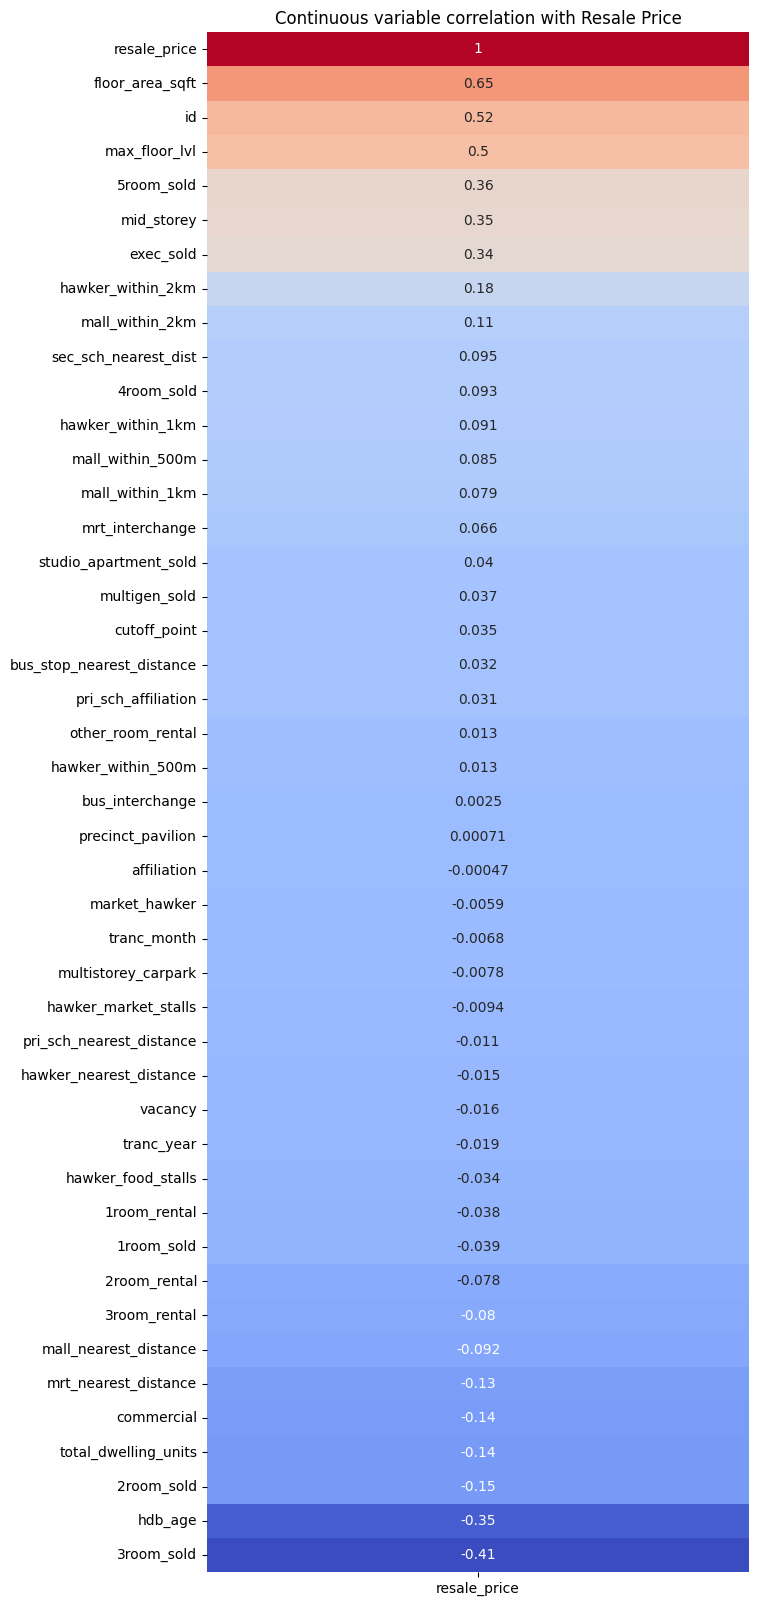

In [31]:
fig, ax = plt.subplots(figsize=(7,20))
g = sns.heatmap(train._get_numeric_data().corr()[['resale_price']]\
                            .sort_values(by='resale_price', ascending=False), 
                            annot=True, cmap='coolwarm', ax=ax, cbar=False)
g.set_title('Continuous variable correlation with Resale Price', y=1);

Unsurprisingly, floor area and max floor level have the highest correlation with resale price. HDB age with a negative correlation makes sense too.

### 1. Yearmonth of transaction vs. Resale price

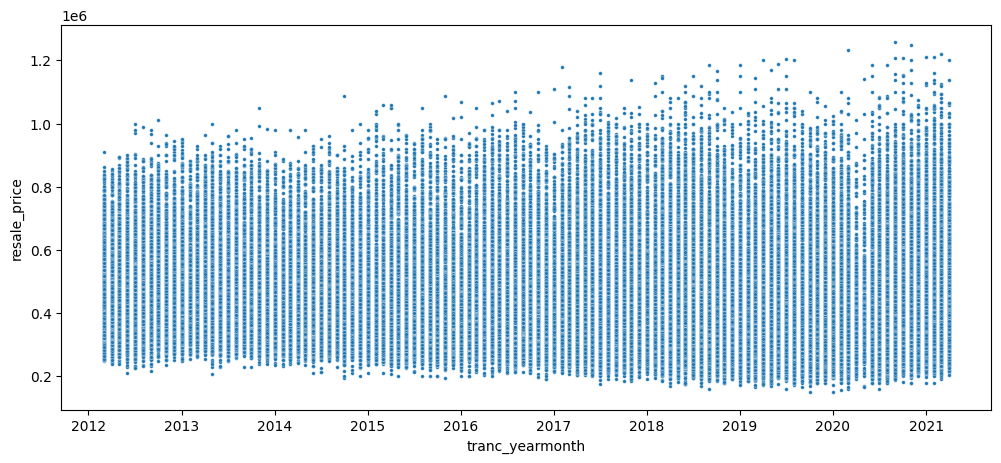

In [32]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x="tranc_yearmonth", y="resale_price", data=train, s=7);

Resale prices have been steadily increasing, with the low outlier figures in 1H' 2020 due to the Covid lockdown.

### 2. Flat type vs. Resale price

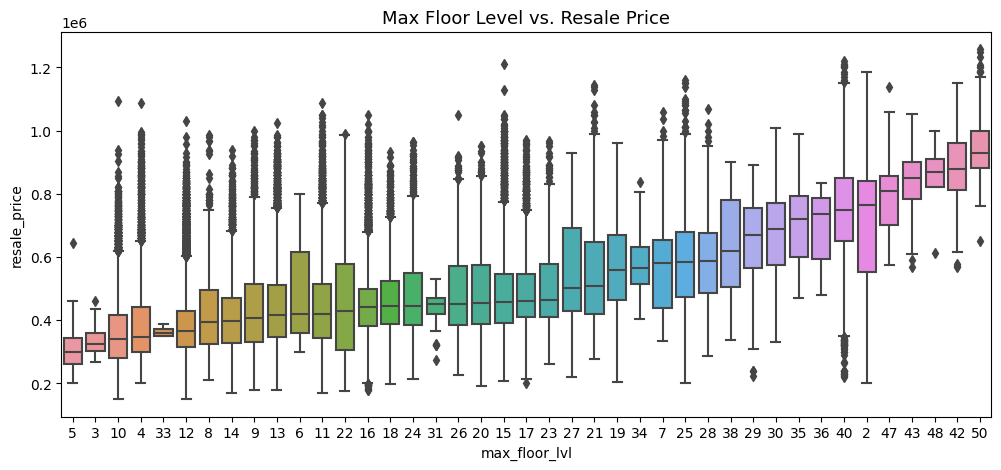

In [33]:
plt.figure(figsize=(12, 5))
order = train.groupby('max_floor_lvl')['resale_price'].median().sort_values().index
ax = sns.boxplot(x="max_floor_lvl", y="resale_price", data=train, order=order)
ax.set_title("Max Floor Level vs. Resale Price", fontsize=13);

No surprises here as Multi-gen, Executive & 5 room flats have the 3 highest median prices.

### 3. Flat model vs. Resale price

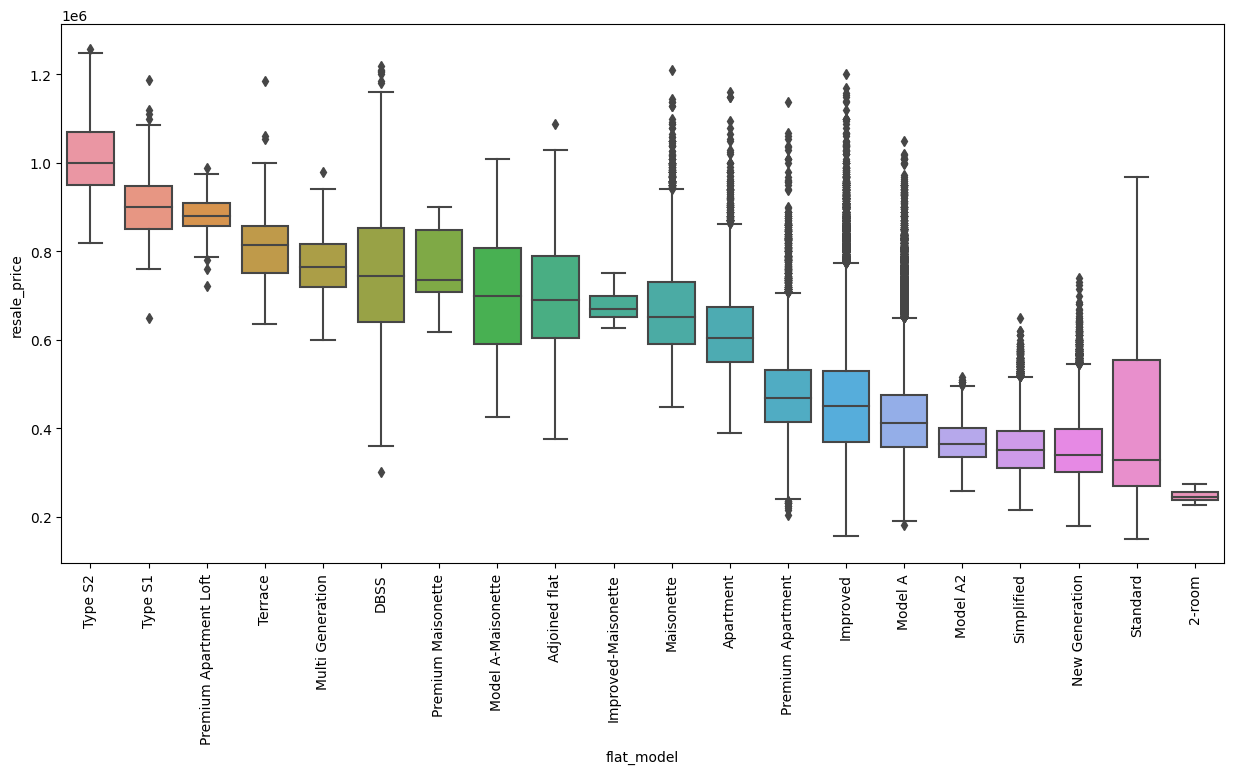

In [34]:
plt.figure(figsize=(15, 7))
order = train.groupby('flat_model')['resale_price'].median().sort_values(ascending=False).index
ax = sns.boxplot(x="flat_model", y="resale_price", data=train, order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

The only S1 & S2 models are in the Outram planning area, which explains the high median prices.

### 4. Year of transaction vs. Resale price

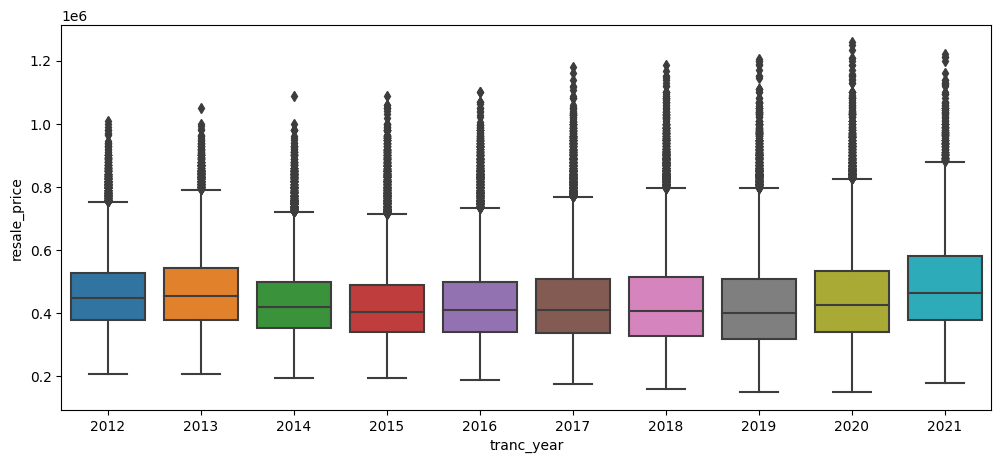

In [35]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="tranc_year", y="resale_price", data=train);

Same steady increasing trend as observed in point 1.

### 5. Month of transaction vs. Resale price

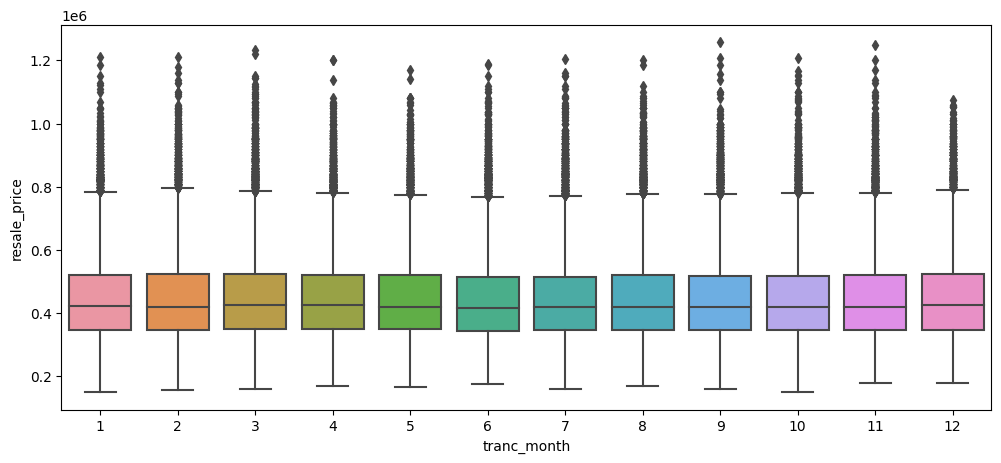

In [36]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="tranc_month", y="resale_price", data=train);

### 6. Mid-storey vs. Resale price

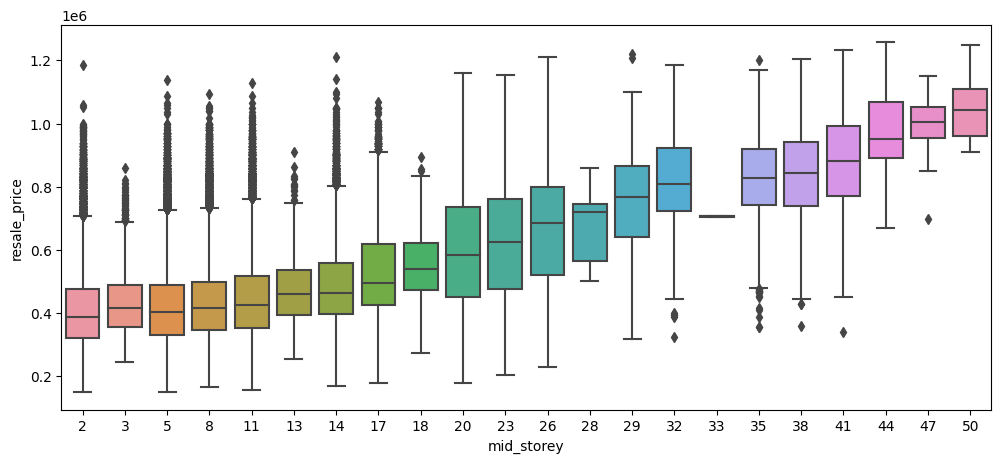

In [37]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="mid_storey", y="resale_price", data=train);

### 7. Full flat type vs. Resale price

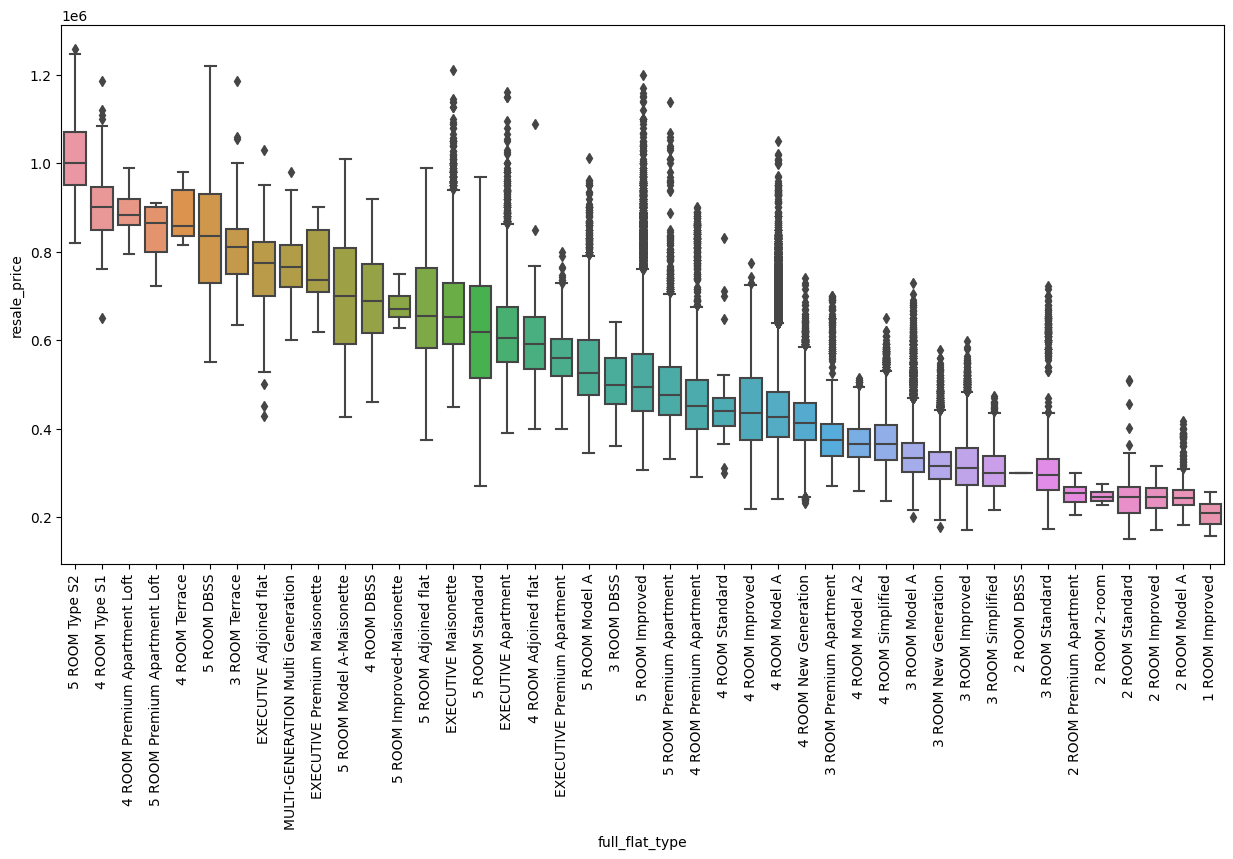

In [38]:
plt.figure(figsize=(15, 7))
order = train.groupby('full_flat_type')['resale_price'].median().sort_values(ascending=False).index
ax = sns.boxplot(x="full_flat_type", y="resale_price", data=train, order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Similar observation as per point 3.

### 8. Floor area in sqft vs. Resale price

/Users/Ron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


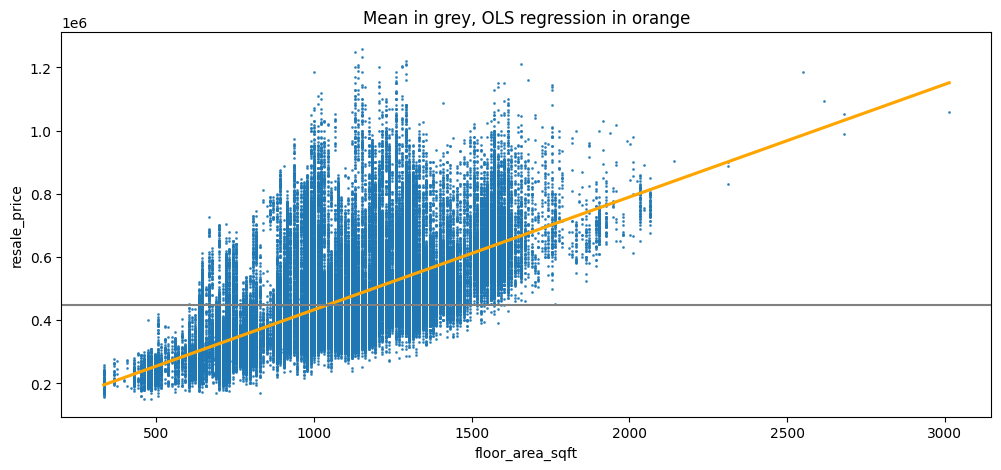

In [39]:
plt.figure(figsize = (12, 5))
sns.regplot('floor_area_sqft', 'resale_price', train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.axhline(train['resale_price'].mean(), color = 'grey')
plt.xlabel('floor_area_sqft')
plt.ylabel('resale_price')
plt.title('Mean in grey, OLS regression in orange');

We observe a positive correlation for size of flat units and resale prices.

### 9. HDB age vs. Resale price

Text(0.5, 1.0, 'HDB Age vs. Resale Price')

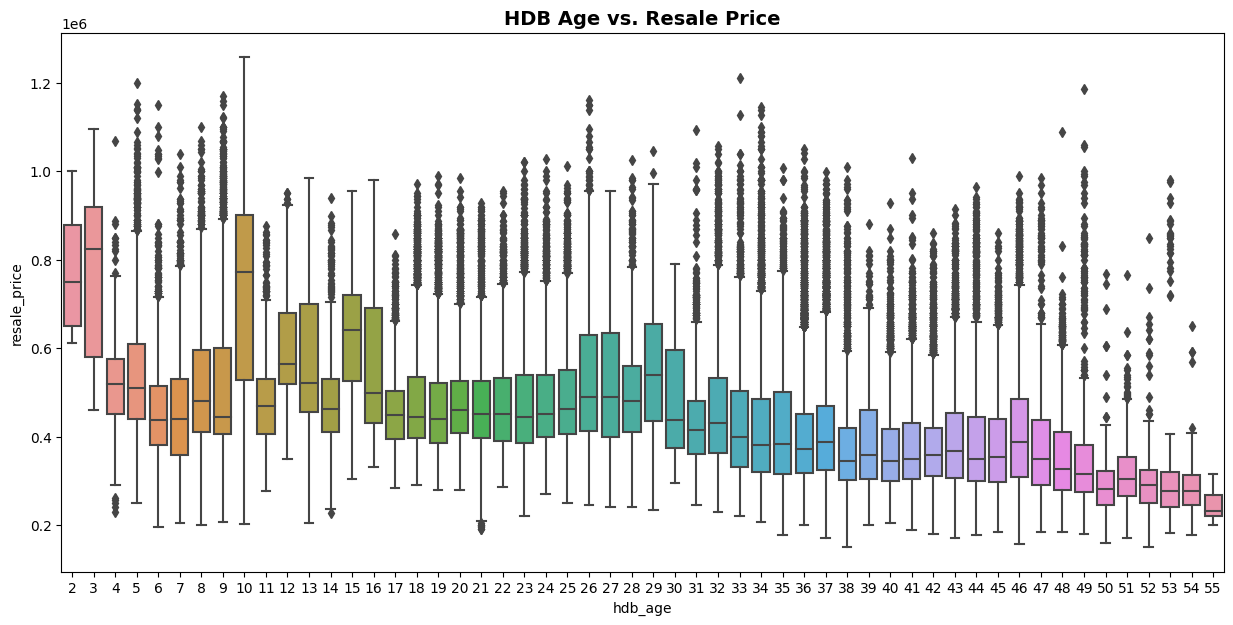

In [40]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="hdb_age", y="resale_price", data=train);
plt.title("HDB Age vs. Resale Price", fontsize=14, fontweight='bold')

Resale prices generally dip as it increases with age.

### 10. Max floor level vs. Resale price

Text(0.5, 1.0, 'Max Floor Level vs. Resale Price')

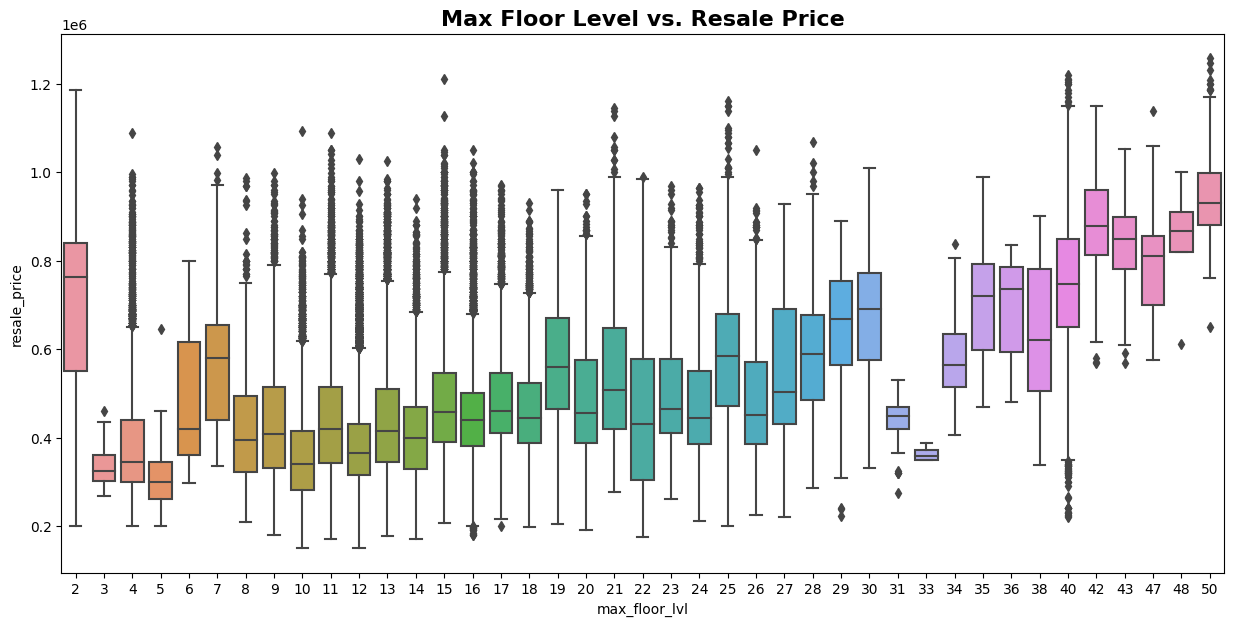

In [41]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(x="max_floor_lvl", y="resale_price", data=train)
plt.title("Max Floor Level vs. Resale Price", fontsize=16, fontweight='bold')

We see a generally increasing trend apart from max floor level 2 as these are mostly flats with Terrace flat model.

### 11-14. Commercial / Market_hawker / Multistorey_carpark / Precinct_pavilion vs. Resale price

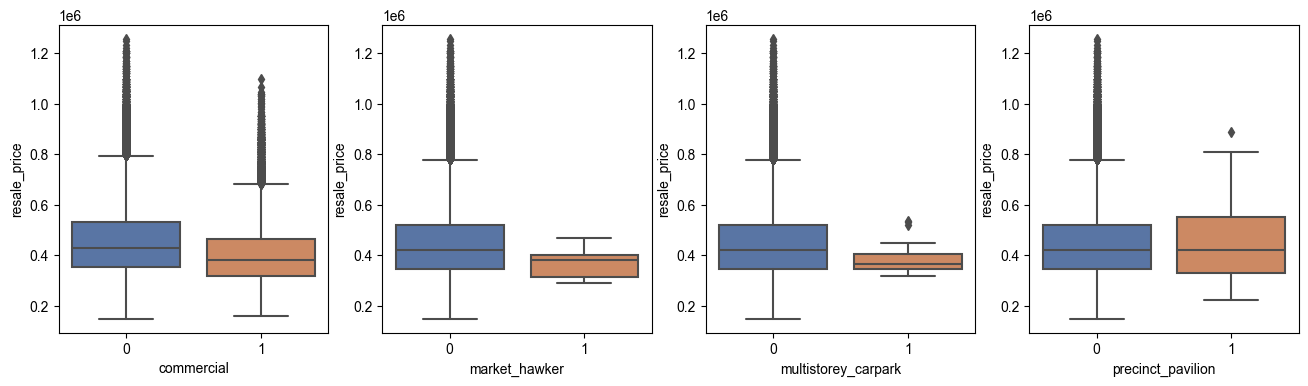

In [42]:
# Create a new DataFrame with the selected columns
same_block = train[['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'resale_price']]

# Define a function to create the boxplot within a specific axis
def create_boxplot(column, ax):
    sns.set(style="ticks")
    sns.boxplot(data=same_block, x=column, y="resale_price", ax=ax)
    return ax

# Create a figure with 1 row and 4 columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Use a for loop to create the boxplots for each column within a specific axis
columns = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']
for i in range(len(columns)):
    axs[i] = create_boxplot(columns[i], axs[i])

# Show the figure
plt.show()

Flats with commercial units and hawkers in the same block tend to be slightly cheaper as compared to their counterparts.

### 15. Total dwelling units vs. Resale price

/Users/Ron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


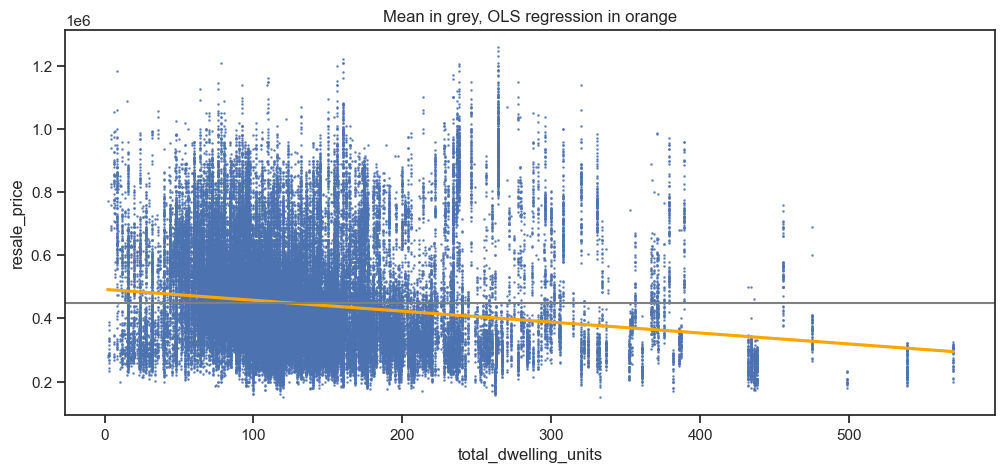

In [43]:
plt.figure(figsize = (12, 5))
sns.regplot('total_dwelling_units', 'resale_price', train, ci=None, 
            scatter_kws = {'s': 0.7}, 
            line_kws = {'color': 'orange'})
plt.axhline(train['resale_price'].mean(), color = 'grey')
plt.xlabel('total_dwelling_units')
plt.ylabel('resale_price')
plt.title('Mean in grey, OLS regression in orange');

Very slight negative correlation can be seen here, probably negligible.

### 16-23. No. of flat types sold vs. Resale price

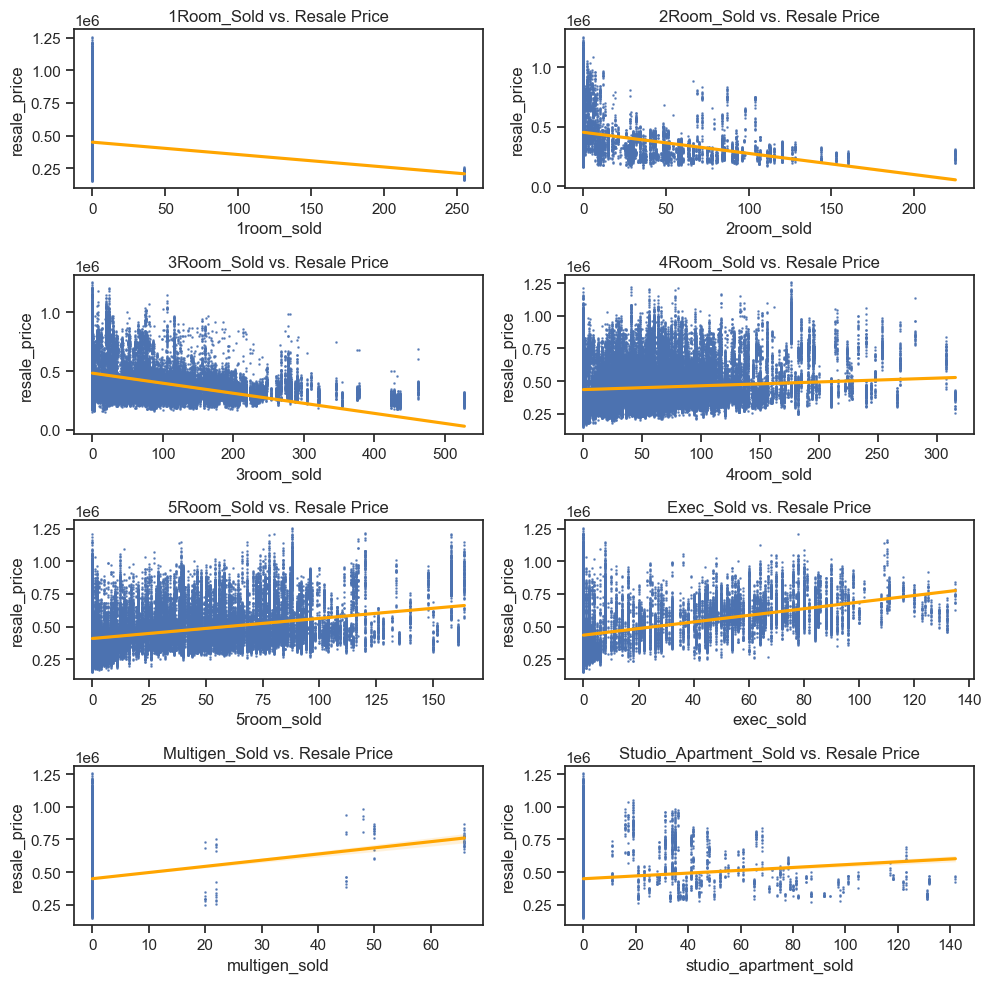

CPU times: user 4min 9s, sys: 2min 43s, total: 6min 53s
Wall time: 3min 5s


In [44]:
%%time
# Define the list of variables to plot
room_sold_vars = ["1room_sold", "2room_sold", "3room_sold", "4room_sold", "5room_sold", "exec_sold", "multigen_sold", "studio_apartment_sold"]

# Create a 4x2 grid of subplots for the regplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

# Flatten the grid of subplots to a 1D array
ax = ax.flatten()

# Loop through the list of variables and plot each one
for i, var in enumerate(room_sold_vars):
    sns.regplot(x=var, y='resale_price', data=train, ax=ax[i], scatter_kws={'s': 0.7}, line_kws={'color': 'orange'})

    # Add title to the subplot indicating the name of the variable plotted on the x-axis
    ax[i].set_title("{} vs. Resale Price".format(var.title()), fontsize=12)
    
# Display the plots
plt.tight_layout()
plt.show()

Only 1-3 room flat types have a negative correlation with resale prices.

### 24-27. No. of rentals by flat type vs. Resale price

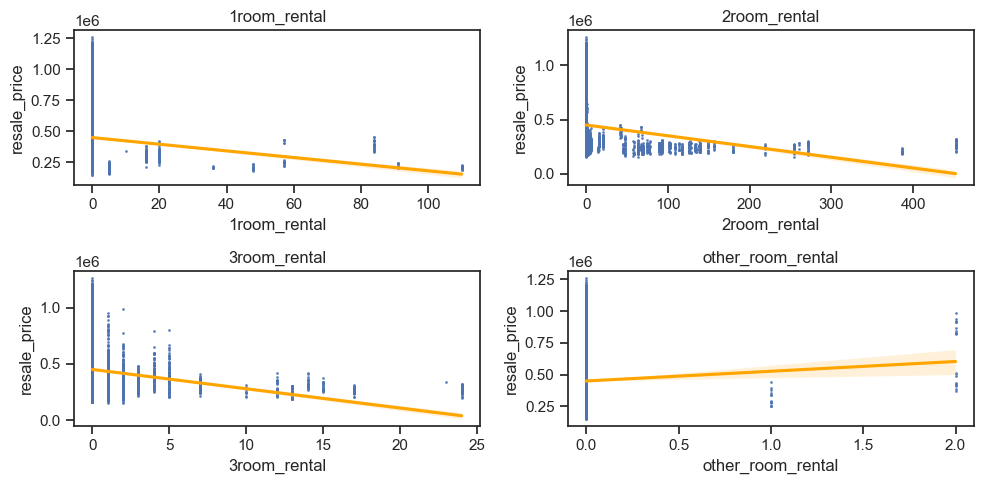

In [45]:
# Define the list of variables to plot
room_sold_vars = ["1room_rental", "2room_rental", "3room_rental", "other_room_rental"]

# Create a 2x2 grid of subplots for the regplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Flatten the grid of subplots to a 1D array
ax = ax.flatten()

# Loop through the list of variables and plot each one
for i, var in enumerate(room_sold_vars):
    sns.regplot(x=var, y='resale_price', data=train, ax=ax[i], scatter_kws={'s': 1}, line_kws={'color': 'orange'})
    ax[i].set_title(var)

# Display the plots
plt.tight_layout()
plt.show()

Same observation as above.

### 28. Planning area vs. Resale price

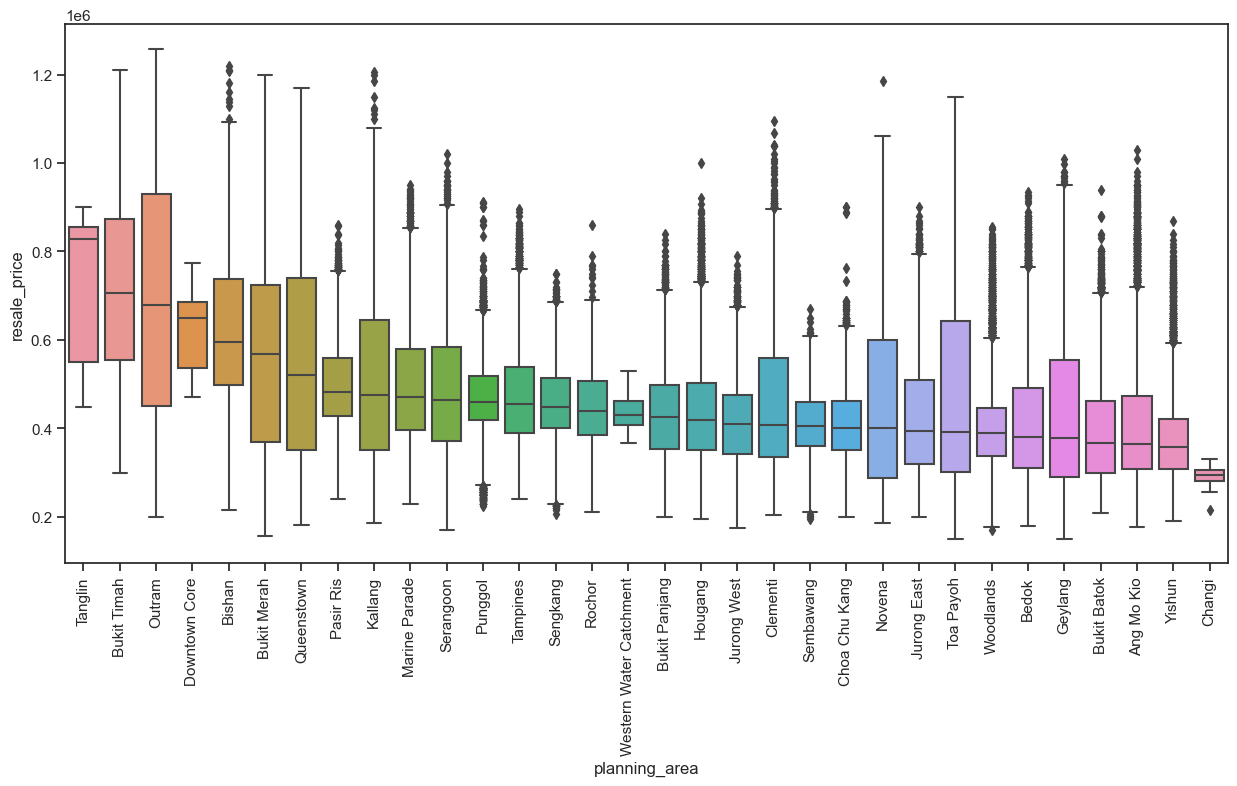

In [46]:
plt.figure(figsize=(15, 7))
order = train.groupby('planning_area')['resale_price'].median().sort_values(ascending=False).index
ax = sns.boxplot(x="planning_area", y="resale_price", data=train, order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Tanglin, Bukit Timah and Outram have the highest resale prices by region as they are located centrally.

### 29-33. Mall distances vs. Resale price

/Users/Ron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


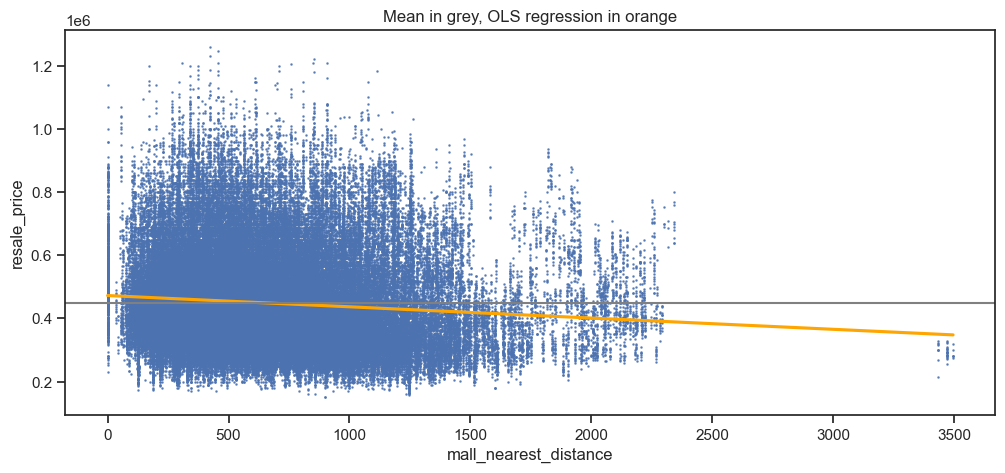

In [47]:
plt.figure(figsize = (12, 5))
sns.regplot('mall_nearest_distance', 'resale_price', train, ci=None, 
            scatter_kws = {'s': 0.7}, 
            line_kws = {'color': 'orange'})
plt.axhline(train['resale_price'].mean(), color = 'grey')
plt.xlabel('mall_nearest_distance')
plt.ylabel('resale_price')
plt.title('Mean in grey, OLS regression in orange');

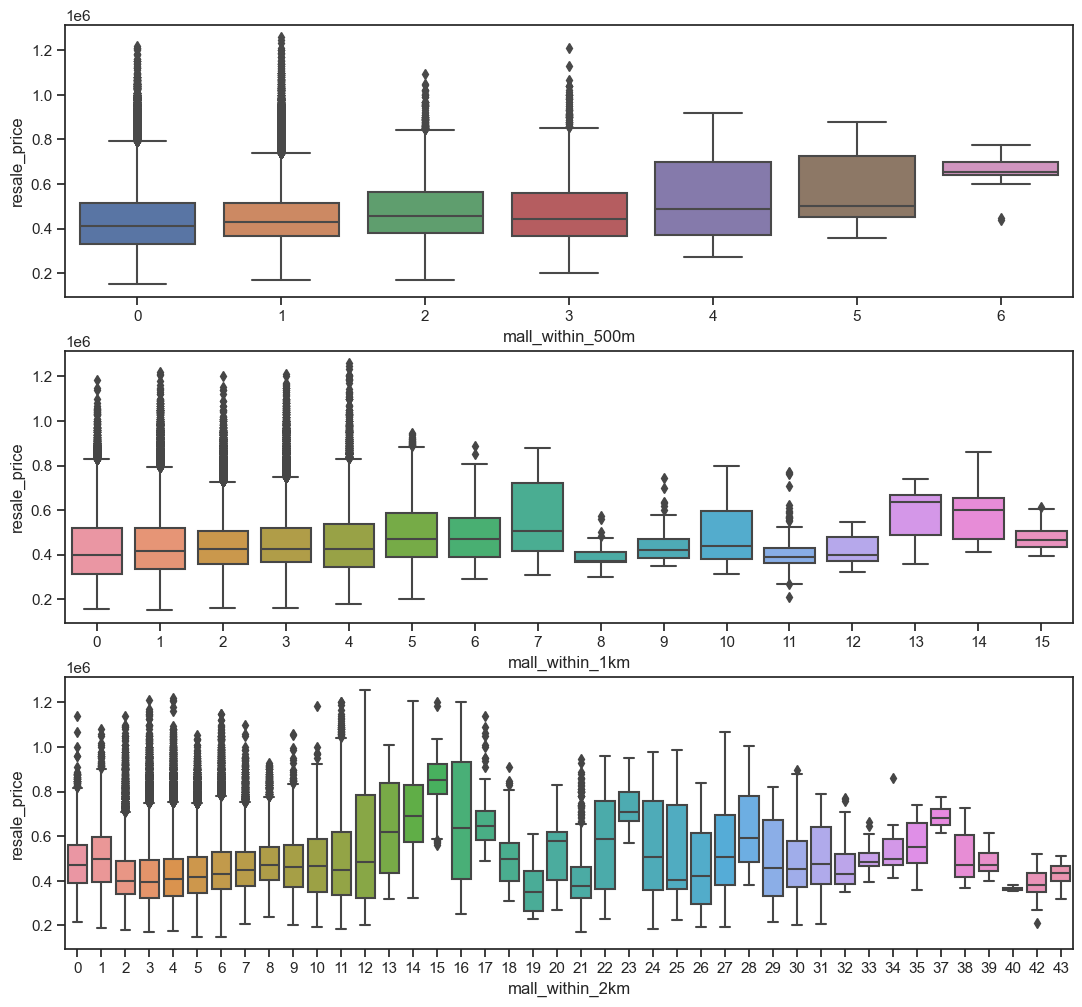

In [48]:
mall = train[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'resale_price']]

# Create a figure with 3 rows and 1 column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13, 12))

# Use a for loop to create the boxplots for each column within a specific axis
columns = ['mall_within_500m', 'mall_within_1km', 'mall_within_2km']
for i in range(len(columns)):
    sns.set(style="ticks")
    sns.boxplot(data=mall, x=columns[i], y="resale_price", ax=axs[i])
    axs[i].set_xlabel(columns[i])

# Show the figure
plt.show()

The most noticeable trend observable here is that within 500m, flats with a higher number of malls are more expensive.

### 34-39. Hawker distances / stalls vs. Resale price

/Users/Ron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


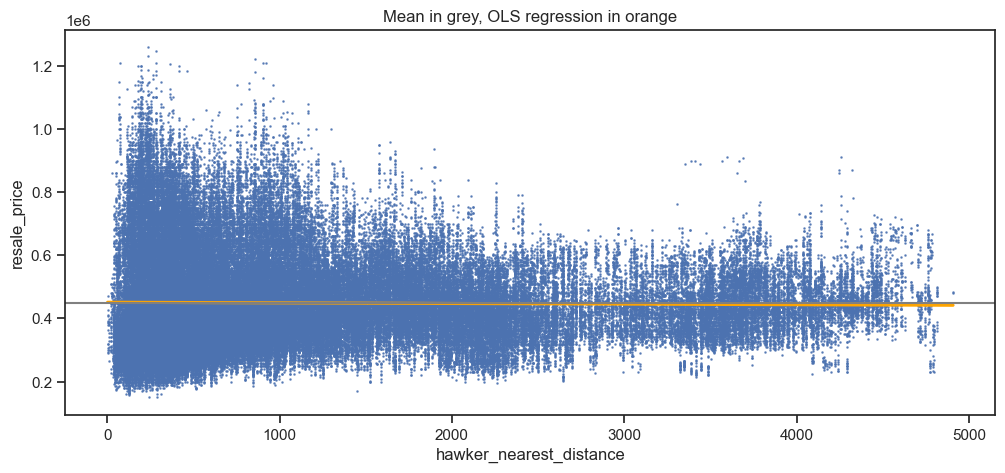

In [49]:
plt.figure(figsize = (12, 5))
sns.regplot('hawker_nearest_distance', 'resale_price', train, ci=None, 
            scatter_kws = {'s': 0.7}, 
            line_kws = {'color': 'orange'})
plt.axhline(train['resale_price'].mean(), color = 'grey')
plt.xlabel('hawker_nearest_distance')
plt.ylabel('resale_price')
plt.title('Mean in grey, OLS regression in orange');

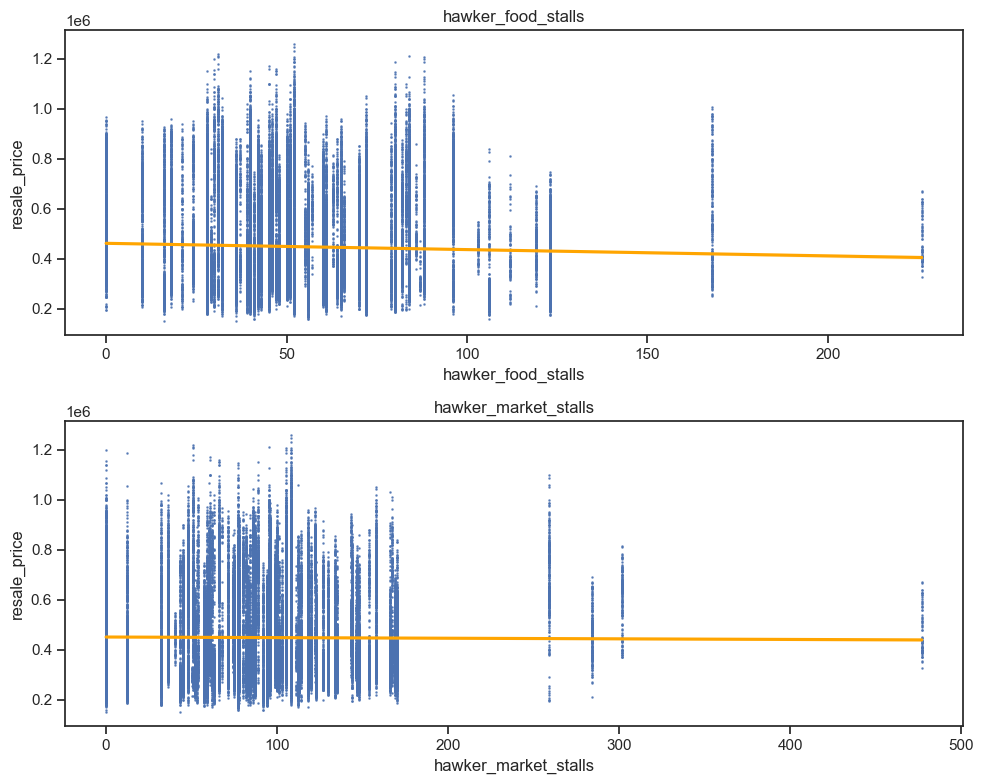

CPU times: user 1min 3s, sys: 43 s, total: 1min 47s
Wall time: 46.8 s


In [50]:
%%time
# Define the list of variables to plot
hawker_stalls = ['hawker_food_stalls', 'hawker_market_stalls']

# Create a 2x2 grid of subplots for the regplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Flatten the grid of subplots to a 1D array
ax = ax.flatten()

# Loop through the list of variables and plot each one
for i, var in enumerate(hawker_stalls):
    sns.regplot(x=var, y='resale_price', data=train, ax=ax[i], scatter_kws={'s': 0.7}, line_kws={'color': 'orange'})
    ax[i].set_title(var)

# Display the plots
plt.tight_layout()
plt.show()

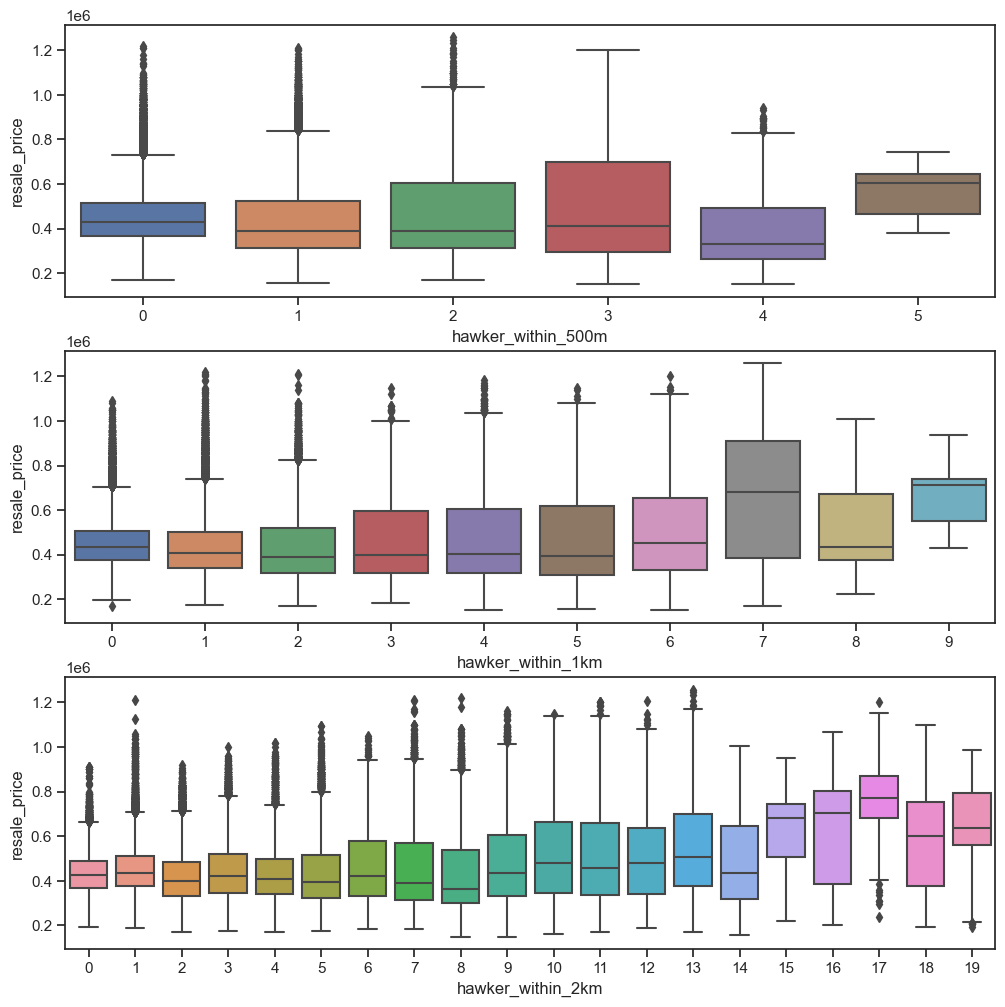

In [51]:
hawker = train[['hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'resale_price']]

# Create a figure with 3 rows and 1 column
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# Use a for loop to create the boxplots for each column within a specific axis
columns = ['hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']
for i in range(len(columns)):
    sns.set(style="ticks")
    sns.boxplot(data=hawker, x=columns[i], y="resale_price", ax=axs[i])
    axs[i].set_xlabel(columns[i])

# Show the figure
plt.show()

A similar observation with Malls may be seen here too for flats within 500m of hawker stalls.

### 40-41. MRT / Bus stop distances vs. Resale price

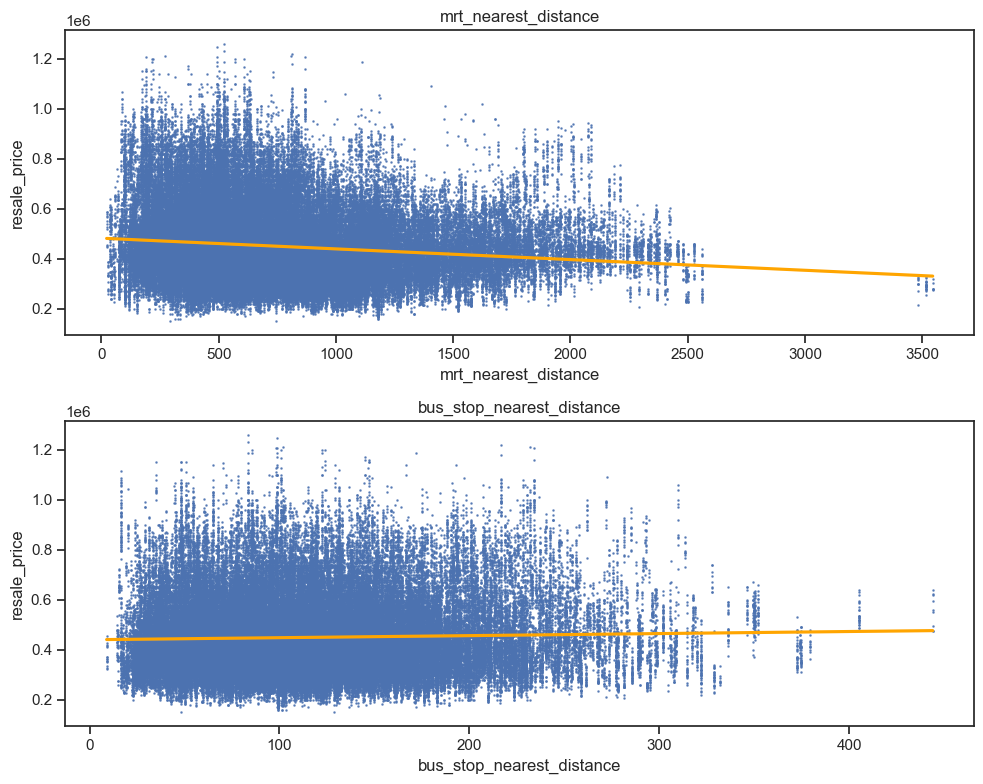

In [52]:
# Define the list of variables to plot
transport_distance = ['mrt_nearest_distance', 'bus_stop_nearest_distance']

# Create a 2x1 grid of subplots for the regplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Flatten the grid of subplots to a 1D array
ax = ax.flatten()

# Loop through the list of variables and plot each one
for i, var in enumerate(transport_distance):
    sns.regplot(x=var, y='resale_price', data=train, ax=ax[i], scatter_kws={'s': 0.7}, line_kws={'color': 'orange'})
    ax[i].set_title(var)

# Display the plots
plt.tight_layout()
plt.show()

A very slight negative correlation between nearest MRT and prices can be observed.

### 42-43. Nearest MRT / Bus interchange vs. Resale price

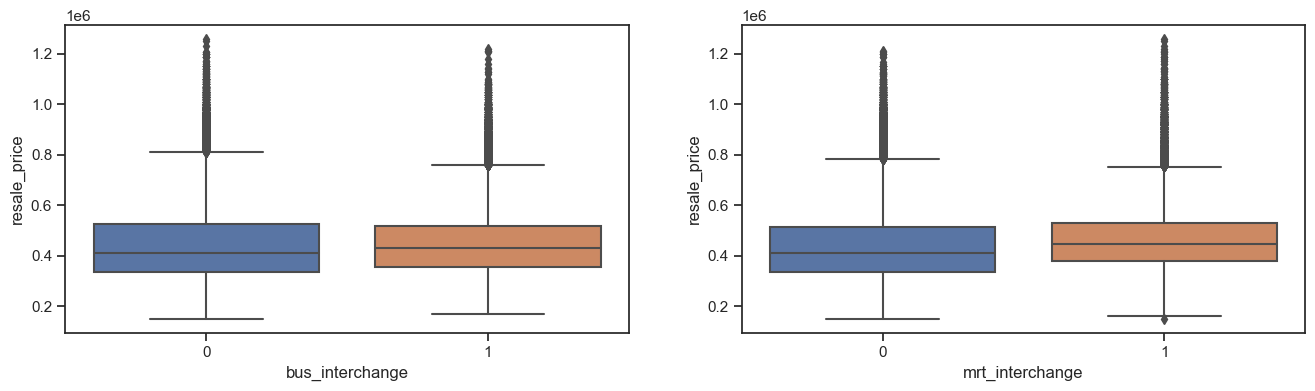

In [53]:
# Create a new DataFrame with the selected columns
interchange = train[['bus_interchange', 'mrt_interchange', 'resale_price']]

# Define a function to create the boxplot within a specific axis
def create_boxplot(column, ax):
    sns.set(style="ticks")
    sns.boxplot(data=interchange, x=column, y="resale_price", ax=ax)
    return ax

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Use a for loop to create the boxplots for each column within a specific axis
columns = ['bus_interchange', 'mrt_interchange']
for i in range(len(columns)):
    axs[i] = create_boxplot(columns[i], axs[i])

# Show the figure
plt.show()

Flats with an interchange at the nearest MRT are very slightly higher than their counterparts.

### 44-45. Nearest school distance vs. Resale price

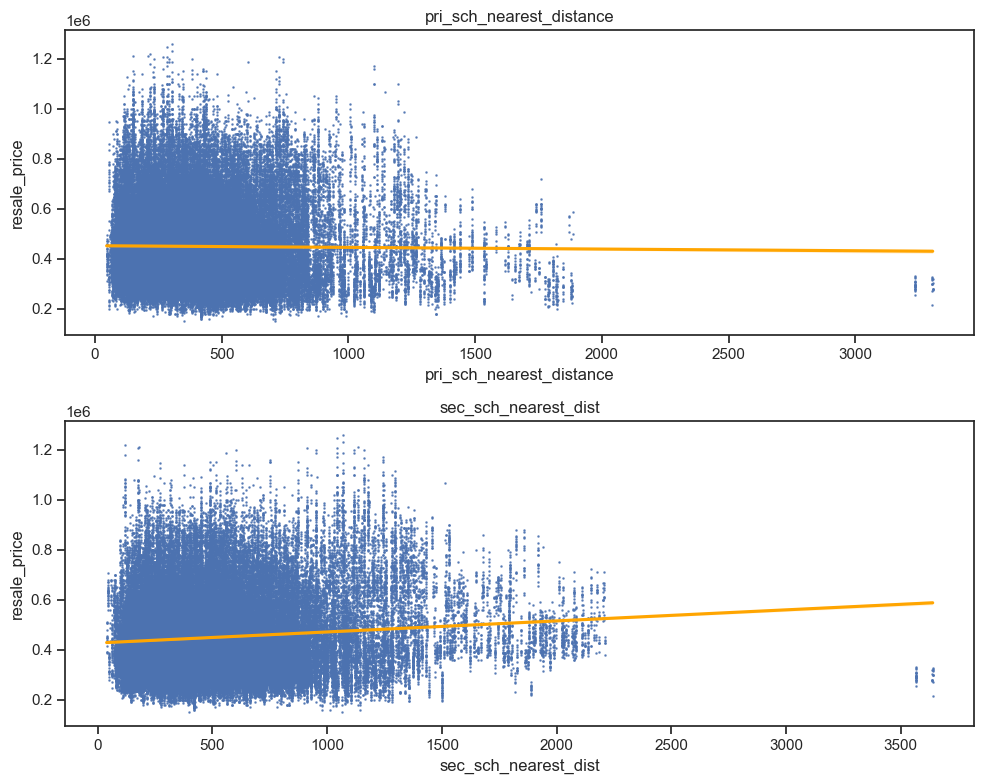

In [54]:
# Define the list of variables to plot
school_distance = ['pri_sch_nearest_distance', 'sec_sch_nearest_dist']

# Create a 2x1 grid of subplots for the regplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Flatten the grid of subplots to a 1D array
ax = ax.flatten()

# Loop through the list of variables and plot each one
for i, var in enumerate(school_distance):
    sns.regplot(x=var, y='resale_price', data=train, ax=ax[i], scatter_kws={'s': 0.7}, line_kws={'color': 'orange'})
    ax[i].set_title(var)

# Display the plots
plt.tight_layout()
plt.show()

No significant correlation observed.

### 46-47. Vacancy / Cutoff point vs. Resale price

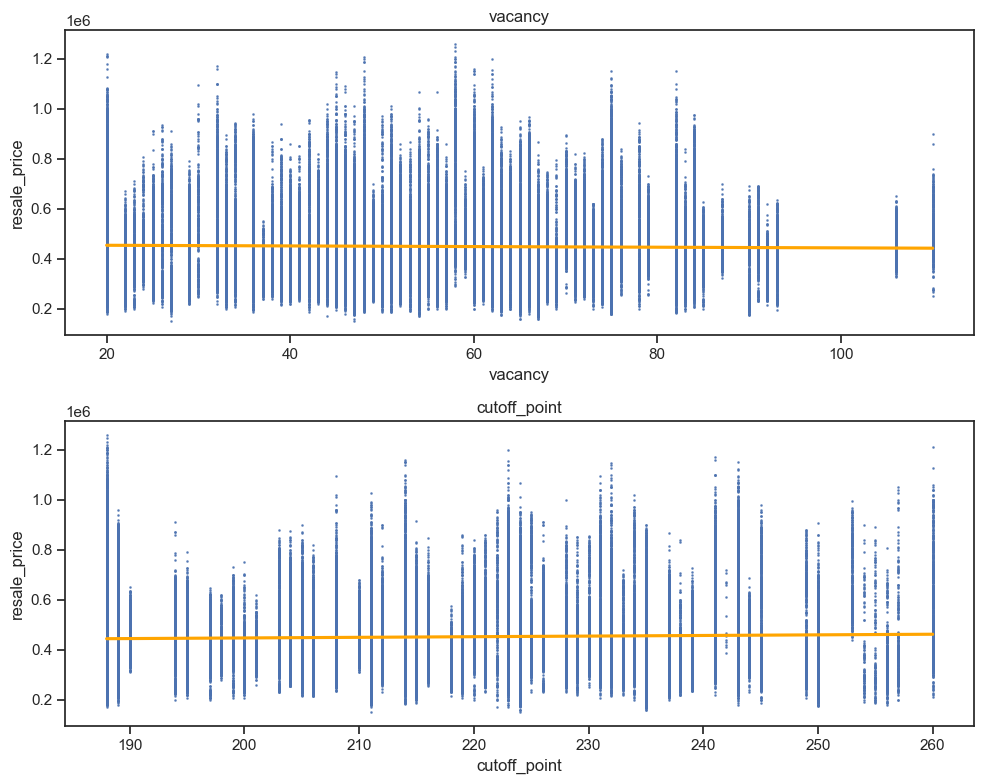

CPU times: user 1min 3s, sys: 40.7 s, total: 1min 43s
Wall time: 52 s


In [55]:
%%time
# Define the list of variables to plot
vacancy_cutoff = ['vacancy', 'cutoff_point']

# Create a 2x2 grid of subplots for the regplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Flatten the grid of subplots to a 1D array
ax = ax.flatten()

# Loop through the list of variables and plot each one
for i, var in enumerate(vacancy_cutoff):
    sns.regplot(x=var, y='resale_price', data=train, ax=ax[i], scatter_kws={'s': 0.8}, line_kws={'color': 'orange'})
    ax[i].set_title(var)

# Display the plots
plt.tight_layout()
plt.show()

No significant correlation observed.

### 48-49. Pri / Sec School affliation vs. Resale price

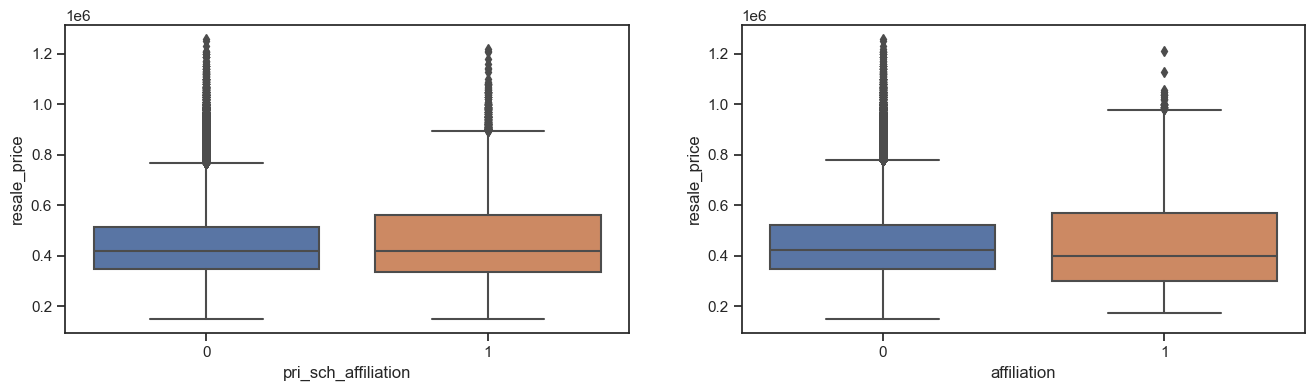

In [56]:
# Create a new DataFrame with the selected columns
affiliation = train[['pri_sch_affiliation', 'affiliation', 'resale_price']]

# Define a function to create the boxplot within a specific axis
def create_boxplot(column, ax):
    sns.boxplot(data=affiliation, x=column, y="resale_price", ax=ax)
    return ax

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Use a for loop to create the boxplots for each column within a specific axis
columns = ['pri_sch_affiliation', 'affiliation']
for i in range(len(columns)):
    axs[i] = create_boxplot(columns[i], axs[i])

# Show the figure
plt.show()

No significant correlation observed.

### Data Cleaning for Test Set

In [58]:
test = pd.read_csv('../datasets/test.csv')

/var/folders/l3/fj37td4n0v5dx2z6bx4nz9cc0000gn/T/ipykernel_47565/1638058713.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../datasets/test.csv')


In [59]:
# specify dtype of 'postal' column as string
test = pd.read_csv("../datasets/test.csv", dtype={'postal': str})

In [60]:
test.shape

(16737, 77)

In [61]:
test[test.columns[test.isna().sum()>0]].isna().sum()

Mall_Nearest_Distance       84
Mall_Within_500m         10292
Mall_Within_1km           2786
Mall_Within_2km            213
Hawker_Within_500m       10755
Hawker_Within_1km         6729
Hawker_Within_2km         3254
dtype: int64

In [62]:
# Convert all columns to snake case
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [63]:
test["tranc_yearmonth"] = pd.to_datetime(test["tranc_yearmonth"])

##### Impute null values

In [64]:
cols = ['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']

test[cols] = test[cols].fillna(0)

##### Drop unnecessary columns

In [65]:
test.drop(columns=["block", "street_name", "storey_range", "floor_area_sqm", "town", "address", "price_per_sqft", 
                   "lease_commence_date", "year_completed", "lower", "upper", "mid", "postal", "latitude", 
                   "longitude", "mrt_name", "mrt_latitude", "mrt_longitude", "bus_stop_name", "bus_stop_latitude", 
                   "bus_stop_longitude", "pri_sch_latitude", "pri_sch_longitude", "sec_sch_latitude", 
                   "sec_sch_longitude", "pri_sch_name", "sec_sch_name"], inplace = True)

In [66]:
test.shape

(16737, 50)

##### Binarize columns

In [67]:
cols_count = ["residential", "commercial", "market_hawker", "multistorey_carpark", "precinct_pavilion"]

for col in cols_count:
    print(f"Value counts for {col}:")
    print(test[col].value_counts())
    print()

Value counts for residential:
Y    16737
Name: residential, dtype: int64

Value counts for commercial:
N    13417
Y     3320
Name: commercial, dtype: int64

Value counts for market_hawker:
N    16737
Name: market_hawker, dtype: int64

Value counts for multistorey_carpark:
N    16736
Y        1
Name: multistorey_carpark, dtype: int64

Value counts for precinct_pavilion:
N    16720
Y       17
Name: precinct_pavilion, dtype: int64



In [68]:
for col in cols_count:
    test[col] = test[col].map({"Y": 1, "N": 0})

In [69]:
test[cols_count].head()

residential  commercial  market_hawker  multistorey_carpark  \
0            1           1              0                    0   
1            1           0              0                    0   
2            1           0              0                    0   
3            1           0              0                    0   
4            1           0              0                    0   

   precinct_pavilion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [70]:
# remove "residential" column as all observations in dataset are residential
test.drop(columns = "residential", inplace = True)

##### change columns' dtype to int

In [71]:
test[["mall_within_500m", "mall_within_1km", "mall_within_2km", "hawker_within_500m", "hawker_within_1km", 
      "hawker_within_2km"]] = train[["mall_within_500m", "mall_within_1km", "mall_within_2km", "hawker_within_500m", 
      "hawker_within_1km", "hawker_within_2km"]].astype(int)

In [72]:
all_flat_types = pd.get_dummies(test['full_flat_type'])
all_areas = pd.get_dummies(test['planning_area'])

test = test.drop(columns=['full_flat_type','planning_area', 'tranc_yearmonth', 'flat_type', 'flat_model'])
test = pd.concat((test,all_flat_types,all_areas), axis=1)

In [73]:
# Change the display format to remove decimal places
pd.options.display.float_format = '{:.0f}'.format
test.head().T

0     1     2      3      4
id                      114982 95653 40303 109506 100149
tranc_year                2012  2019  2013   2017   2016
tranc_month                 11     8    10     10      8
mid_storey                   8     5     8      2     17
floor_area_sqft            904  1206   732   1044   1109
...                        ...   ...   ...    ...    ...
Tanglin                      0     0     0      0      0
Toa Payoh                    0     0     0      0      0
Western Water Catchment      0     0     0      0      0
Woodlands                    0     0     0      1      0
Yishun                       1     0     0      0      0

[116 rows x 5 columns]

In [74]:
# Convert all columns to snake case
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [75]:
# save cleaned test dataset as test2
test.to_csv('../datasets/test2.csv', index=False)